# Sommaire :


### <a href="#C1"> **Partie 1 : Contexte et Objectifs**</a>

 - Contexte
 - Objectifs

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> Import des packages</a>
 - <a href="#C22"> Repertoire de travail</a>
 - <a href="#C23"> Changement du répertoire courant</a>
 - <a href="#C24"> Import des datas frames</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</a>
 - <a href="#C31"> Display</a>
 - <a href="#C32"> Structure du dataframes</a>
 - <a href="#C33"> Les valeurs manquantes et les doublons du dataframes</a>
 - <a href="#C34"> Data inspections</a>
 - <a href="#C35"> Data Visualisation Multivariée</a>
 - <a href="#C36"> Normalité </a>
    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Cleaning**</a>
 - <a href="#C41"> Encoding object colonnes (LabelEncoding/OrdinalEncoder/OneHotEncoding)</a>
 - <a href="#C42"> Rename columns</a>
 - <a href="#C43"> Drop useless columns</a>
 - <a href="#C44"> Export csv</a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : Conclusion**</a>


# <a name="C1">**Partie 1 : Contexte et Objectifs**</a> 

Contexte

Je suis consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

Objectifs

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [1]:
# Built-in
import os
import warnings 

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

# Valeurs manquantes
import missingno

#Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,StandardScaler,MinMaxScaler

#metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

# feature selection
#from sklearn.feature_selection import VarianceThreshold
#from scipy.stats import entropy

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [2]:
os.listdir('data/source')

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [3]:
import glob
currentDirectory = os.getcwd()
os.chdir('data/source/')
csvList = glob.glob('**/*.csv', recursive = True)
os.chdir(currentDirectory)

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [4]:
for l in csvList:
    print(l)
    
    name = "'_'.join(l.split('_')[1:-1])"
    exec('df_'+eval(name)+'= pd.read_csv("data/source/'+l+'") ')

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


# <a name="C3"><font color='teal'>**Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</font></a> 

### <a name="C31"><font color='teal'>3.1 Display</font></a>

In [5]:
# Base de données contenant la liste des clients
df_customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [6]:
# base de données contenant la liste des commandes
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [7]:
# Dataframe contenant le detail des paiement des commandes (division/echelonnement/type de paiement/montant)
df_order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [8]:
# CSV contenant la liste des articles détaillé de chaque commande
df_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [9]:
# CSV contenant la liste de tous les articles 
df_products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [10]:
# Dataframe contenant la liste des dendeur de la plateforme d'Olist
df_sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [11]:
# Dataframe contenant la liste des commentaires(commentaires/notes) associé à chaque commande
df_order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [12]:
# Dataframe contenant la liste des traductions des nom de produit en anglais 
df_category_name.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [13]:
# Dataframe contenant la liste des localisation non précises associé au zip code
df_geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

</br>

</br>

</br>

### <a name="C32"><font color='teal'>3.2 Structure du dataframe</font></a> 

In [14]:
def structure_df(df):
    """ Return few information abut the df past in argument """
    df_temp = pd.DataFrame()
    df_temp["count"] = df.apply( lambda x: len(x) )
    df_temp["nunique"] = df.apply(lambda x: x.nunique() )
    df_temp["NbNa"] = df.apply(lambda x: x.isna().sum() )
    
    # frequence et mode
    df_temp["top1"] = df.apply(lambda x: x.value_counts(ascending=False).index[0] )
    df_temp["freq1"] = df.apply(lambda x: x.value_counts(ascending=False).iloc[0] )
    df_temp["top2"] = df.apply(lambda x: x.value_counts(ascending=False).index[1] )
    df_temp["freq2"] = df.apply(lambda x: x.value_counts(ascending=False).iloc[1] )
    
    #df_temp["Min"] = df.apply(lambda x: x.min() )
    #df_temp["Max"] = df.apply(lambda x: x.max() )
    
    df_temp["Dtype"] = df.apply(lambda x: x.dtype )
    
    return df_temp
    

### Les clients

In [15]:
structure_df(df=df_customers)

count  nunique  NbNa  \
customer_id               99441    99441     0   
customer_unique_id        99441    96096     0   
customer_zip_code_prefix  99441    14994     0   
customer_city             99441     4119     0   
customer_state            99441       27     0   

                                                      top1  freq1  \
customer_id               06b8999e2fba1a1fbc88172c00ba8bc7      1   
customer_unique_id        8d50f5eadf50201ccdcedfb9e2ac8455     17   
customer_zip_code_prefix                             22790    142   
customer_city                                    sao paulo  15540   
customer_state                                          SP  41746   

                                                      top2  freq2   Dtype  
customer_id               c023f30c1147aeb0358474f3b1dbc707      1  object  
customer_unique_id        3e43e6105506432c953e165fb2acf44c      9  object  
customer_zip_code_prefix                             24220    124   int64  
customer_city                               rio de janeiro   6882  object  
customer_state                                          RJ  12852  object

Ce dataset contient une liste de <font color='red'>99441</font></b> commandes effectuées et <font color='red'>96096</font></b> clients uniques.</br>
Donc certains clients ont commandé plusieurs fois sur le site (plateforme)</br>
<font color='red'>0 Valeurs manquantes</font>

In [16]:
res = np.sum(df_customers.customer_unique_id.value_counts(ascending=False)>1)/df_customers.customer_unique_id.nunique()
print("Environ {:.3%} des clients ont commandé plus d'une foix sur le site.".format(res) )
del res

Environ 3.119% des clients ont commandé plus d'une foix sur le site.


### Les commandes

In [17]:
structure_df(df=df_orders)

count  nunique  NbNa  \
order_id                       99441    99441     0   
customer_id                    99441    99441     0   
order_status                   99441        8     0   
order_purchase_timestamp       99441    98875     0   
order_approved_at              99441    90733   160   
order_delivered_carrier_date   99441    81018  1783   
order_delivered_customer_date  99441    95664  2965   
order_estimated_delivery_date  99441      459     0   

                                                           top1  freq1  \
order_id                       e481f51cbdc54678b7cc49136f2d6af7      1   
customer_id                    9ef432eb6251297304e76186b10a928d      1   
order_status                                          delivered  96478   
order_purchase_timestamp                    2018-04-11 10:48:14      3   
order_approved_at                           2018-02-27 04:31:10      9   
order_delivered_carrier_date                2018-05-09 15:48:00     47   
order_delivered_customer_date               2018-05-08 23:38:46      3   
order_estimated_delivery_date               2017-12-20 00:00:00    522   

                                                           top2  freq2   Dtype  
order_id                       f01059d0d674e1282df4e8fbbe015aa2      1  object  
customer_id                    413f7e58270a32396af030a075b924be      1  object  
order_status                                            shipped   1107  object  
order_purchase_timestamp                    2018-07-28 13:11:22      3  object  
order_approved_at                           2017-11-07 07:30:38      7  object  
order_delivered_carrier_date                2018-05-10 18:29:00     32  object  
order_delivered_customer_date               2016-10-27 17:32:07      3  object  
order_estimated_delivery_date               2018-03-12 00:00:00    516  object

In [18]:
df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Le champ <font color='red'>order_status</font> est composé de 8 modalités.</br>
Dont la modalité 'canceled', qui peut correspondre à une erreur effectué par le client lors de la validation de son panier.</br>
Manifestement le panier pour une raison quelconque n'est pas désiré et ces commandes seront supprimées.</br>
<font color='red'>Un Na ici correspond à un evenement non encore réalisé.</font>

In [19]:
df_orders = df_orders.loc[df_orders.order_status != 'canceled']
df_orders = df_orders.loc[df_orders.order_status != 'unavailable']

In [20]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

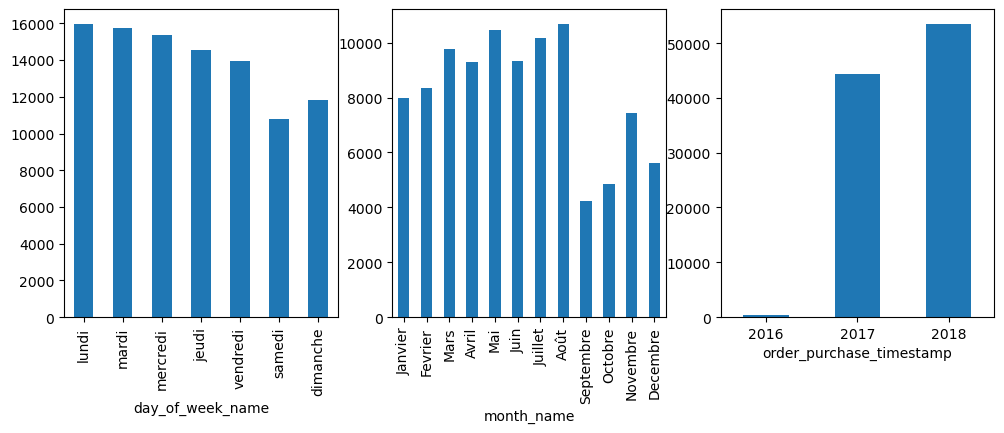

In [21]:
### Vision global d'achet par jour
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(12, 4))
dt_temp = df_orders.copy()
dw_mapping={ 
    0 : '0-lundi', 
    1 : '1-mardi', 
    2 : '2-mercredi', 
    3 : '3-jeudi', 
    4 : '4-vendredi', 
    5 : '5-samedi', 
    6 : '6-dimanche' 
}
dt_temp['day_of_week_name' ]=dt_temp['order_purchase_timestamp'].dt.weekday .map(dw_mapping)
dt_temp.groupby(['day_of_week_name'] )["order_id"].count().plot( kind='bar', rot=0,ax=axs[0])
axs[0].set_xticklabels(['lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche'],
                      rotation=90)

### Vision global d'achet par mois
mn_mapping={ 
    1 : '0-Janvier', 
    2 : '1-Fevrier', 
    3 : '2-Mars', 
    4 : '3-Avril', 
    5 : '4-Mai', 
    6 : '5-Juin', 
    7 : '6-Juillet',
    8 : '7-Août',
    9 : '8-Septembre',
    10 : '9-Octobre',
    11: '91-Novembre',
    12: '92-Decembre'
}
dt_temp['month_name' ]=dt_temp['order_purchase_timestamp'].dt.month.map(mn_mapping)
dt_temp.groupby(['month_name'] )["order_id"].count().plot( kind='bar', rot=0,ax=axs[1])
axs[1].set_xticklabels(['Janvier','Fevrier','Mars','Avril','Mai','Juin','Juillet','Août','Septembre','Octobre','Novembre','Decembre'],
                      rotation=90)

### Vision global d'achet par année
dt_temp.groupby(dt_temp["order_purchase_timestamp"].dt.year)["order_id"].count().plot( kind='bar', rot=0,ax=axs[2]);

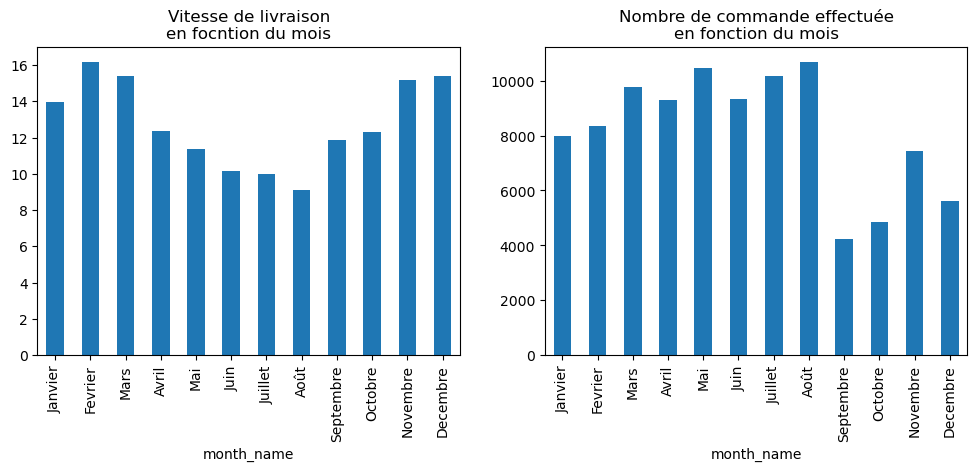

In [22]:
### Vitesse de livraison
fig, g = plt.subplots(nrows=1,ncols=2,figsize=(12, 4))
dt_temp['vitesse_livraison' ]=dt_temp['order_delivered_customer_date'] - dt_temp['order_purchase_timestamp']
(dt_temp.groupby(['month_name'] )['vitesse_livraison'].mean()/ np.timedelta64(1, 'D')).plot( kind='bar', rot=0,ax = g[0])
g[0].set_xticklabels(['Janvier','Fevrier','Mars','Avril','Mai','Juin','Juillet','Août','Septembre','Octobre','Novembre','Decembre'],
                      rotation=90)
g[0].set_title('Vitesse de livraison\nen focntion du mois')

dt_temp['month_name' ]=dt_temp['order_purchase_timestamp'].dt.month.map(mn_mapping)
dt_temp.groupby(['month_name'] )["order_id"].count().plot( kind='bar', rot=0,ax=g[1])
g[1].set_xticklabels(['Janvier','Fevrier','Mars','Avril','Mai','Juin','Juillet','Août','Septembre','Octobre','Novembre','Decembre'],
                      rotation=90)
g[1].set_title('Nombre de commande effectuée\nen fonction du mois');


La vitesse de liavraison est inversement corrélée à la consommation, plus la consommation du mois élevé plus les commande sont livré rapidement

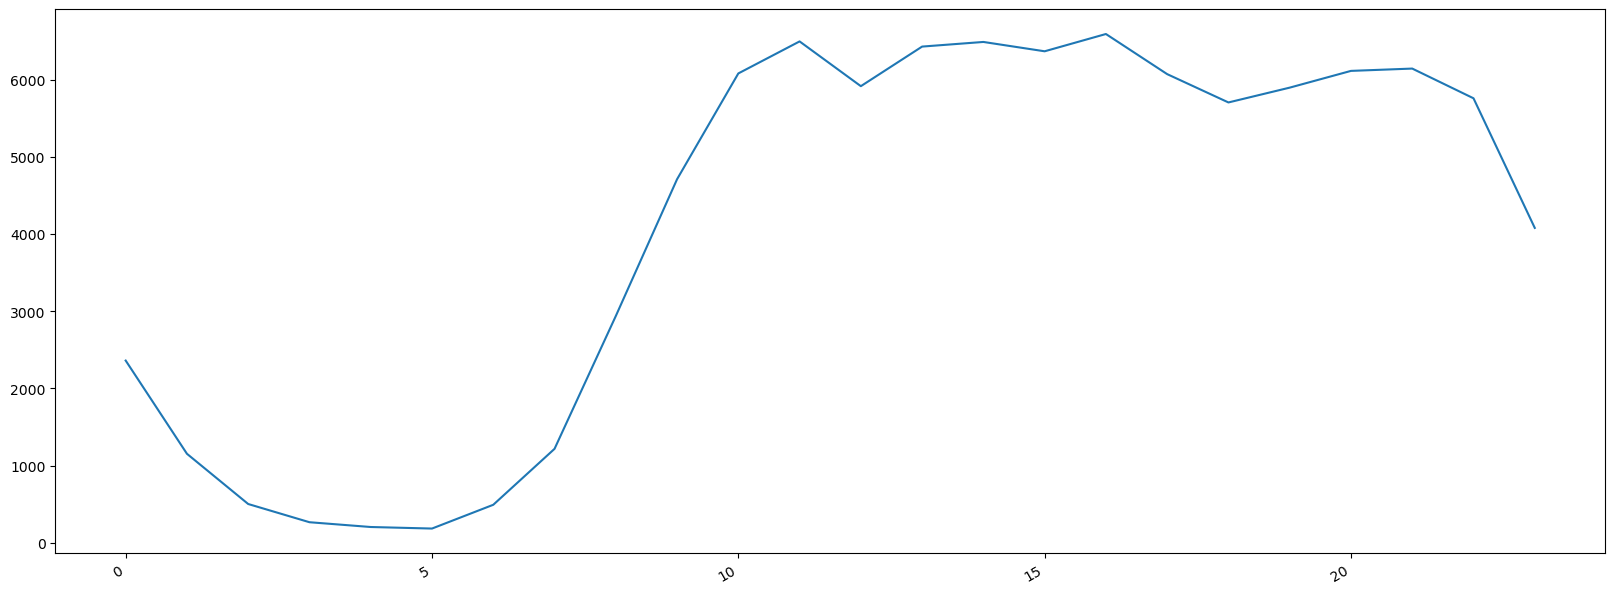

In [23]:
import matplotlib.dates as mdates

dt_temp = df_orders.copy().groupby(df_orders["order_purchase_timestamp"].dt.hour)["order_id"].count().reset_index()
dt_temp.columns = ["date",'Effectif']

fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(dt_temp["date"], dt_temp["Effectif"])

fig.autofmt_xdate()

Le nombre de commandes diminuent la nuit. Les clients dorment

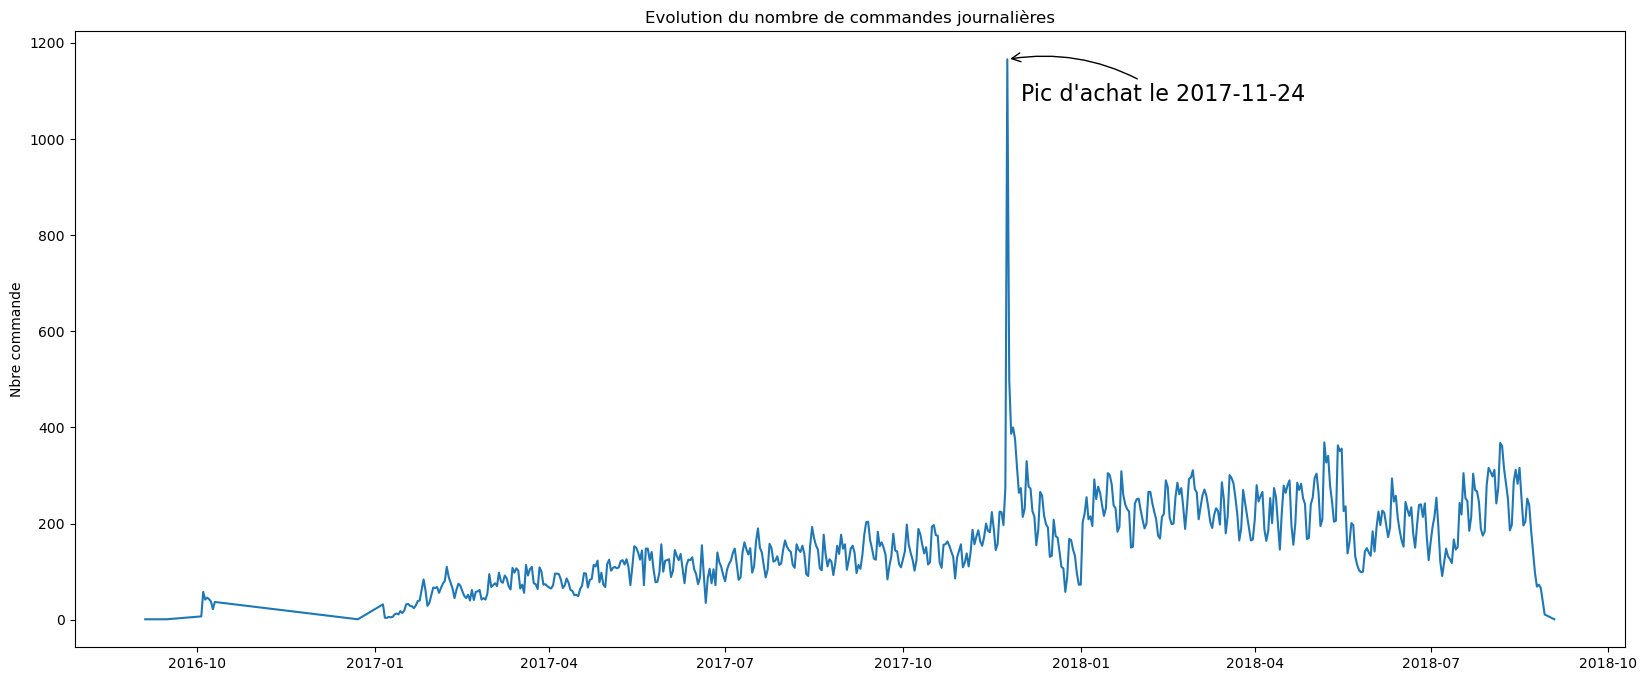

In [24]:
Nb_commande_journalier = df_orders.groupby(df_orders["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = Nb_commande_journalier.plot()
ax.set_ylabel("Nbre commande")
ax.set_xlabel("")
plt.title("Evolution du nombre de commandes journalières")

ax.annotate(r"Pic d'achat le "+ str(Nb_commande_journalier.index[Nb_commande_journalier.argmax()]),
         xy=(Nb_commande_journalier.index[Nb_commande_journalier.argmax()], Nb_commande_journalier[Nb_commande_journalier.argmax()]), 
            xycoords='data',
         xytext=(+10, -30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.show()

#### Delai de livraison

In [25]:
df_orders['delai_livraison'] = (df_orders.order_delivered_customer_date - df_orders.order_purchase_timestamp).dt.days
df_orders.loc[df_orders['delai_livraison'].isna(),'delai_livraison'] = (df_orders.order_estimated_delivery_date - df_orders.order_purchase_timestamp).dt.days[df_orders['delai_livraison'].isna()]

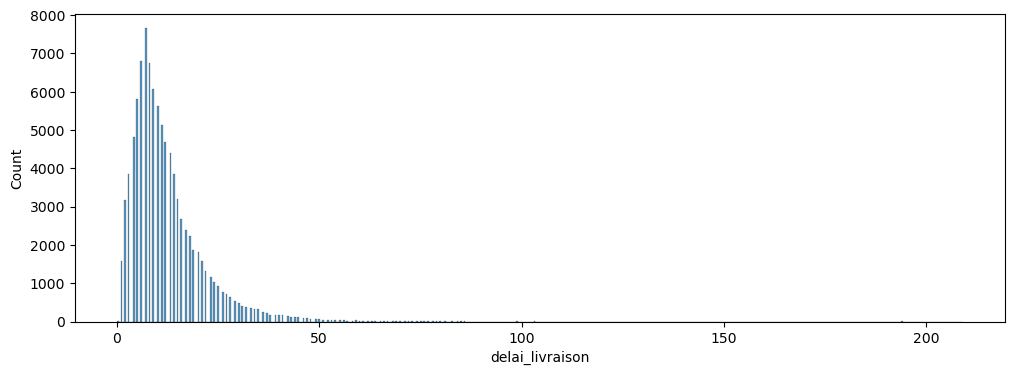

In [26]:
fig = plt.figure(figsize=(12, 4))
ax = sns.histplot(data = df_orders, x = 'delai_livraison')

### Les paiements

In [27]:
structure_df(df=df_order_payments)

count  nunique  NbNa                              top1  \
order_id              103886    99440     0  fa65dad1b0e818e3ccc5cb0e39231352   
payment_sequential    103886       29     0                                 1   
payment_type          103886        5     0                       credit_card   
payment_installments  103886       24     0                                 1   
payment_value         103886    29077     0                              50.0   

                      freq1                              top2  freq2    Dtype  
order_id                 29  ccf804e764ed5650cd8759557269dc13     26   object  
payment_sequential    99360                                 2   3039    int64  
payment_type          76795                            boleto  19784   object  
payment_installments  52546                                 2  12413    int64  
payment_value           324                              20.0    274  float64

Un paiement peut etre diviser et chaque division peut etre echelonner sur plrs versement.</br>
La somme de payment_value d'une commande doit etre égal à la somme des prix des articles plus la somme du montant du fret associé.</br>
On constate qu'ici il manque une commande par rapport au dataset df_orders ou df_customers.</br>
</br>
<font color='red'>Pas de valeurs manquantes.</font>

In [28]:
df_order_payments.payment_installments.value_counts().sort_index()

0         2
1     52546
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: payment_installments, dtype: int64

payment_installments = 0 correspond surement à une erreur.
0 devient 1

In [29]:
df_order_payments['payment_installments'].loc[df_order_payments.order_id.isin(df_order_payments['order_id'].loc[df_order_payments.payment_installments==0].to_list())]=1

C:\Users\eleor\AppData\Local\Temp\ipykernel_12856\2970739218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_payments['payment_installments'].loc[df_order_payments.order_id.isin(df_order_payments['order_id'].loc[df_order_payments.payment_installments==0].to_list())]=1


''

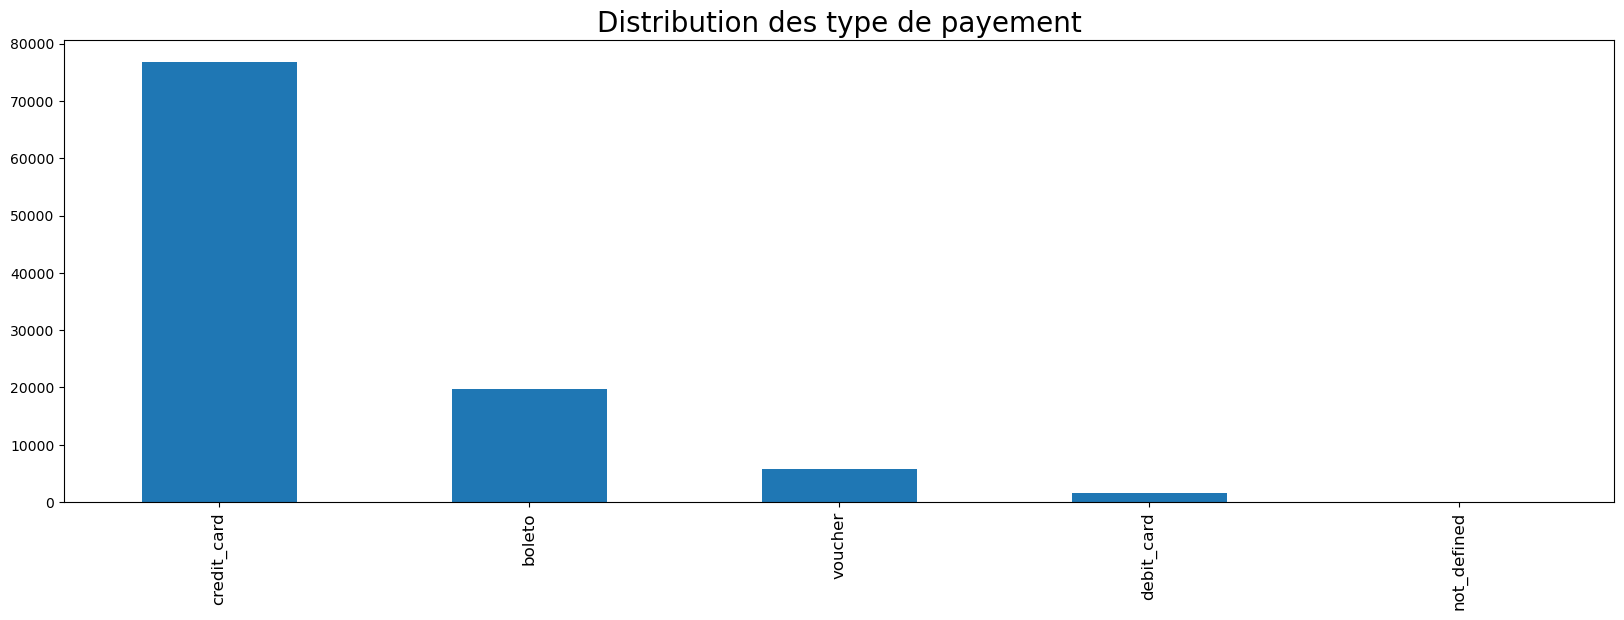

In [30]:
fig = plt.figure(figsize=(20, 6))
ax = df_order_payments.payment_type.value_counts().plot(kind = 'bar')
ax.set_title( "Distribution des type de payement",fontsize =20)
ax.set_xlabel("")
ax.xaxis.set_tick_params(labelsize=12)
;

### Articles des commandes

In [31]:
structure_df(df=df_order_items)

count  nunique  NbNa                              top1  \
order_id             112650    98666     0  8272b63d03f5f79c56e9e4120aec44ef   
order_item_id        112650       21     0                                 1   
product_id           112650    32951     0  aca2eb7d00ea1a7b8ebd4e68314663af   
seller_id            112650     3095     0  6560211a19b47992c3666cc44a7e94c0   
shipping_limit_date  112650    93318     0               2017-07-21 18:25:23   
price                112650     5968     0                              59.9   
freight_value        112650     6999     0                              15.1   

                     freq1                              top2  freq2    Dtype  
order_id                21  1b15974a0141d54e36626dca3fdc731a     20   object  
order_item_id        98666                                 2   9803    int64  
product_id             527  99a4788cb24856965c36a24e339b6058    488   object  
seller_id             2033  4a3ca9315b744ce9f8e9374361493884   1987   object  
shipping_limit_date     21               2018-03-01 02:50:48     21   object  
price                 2481                              69.9   1987  float64  
freight_value         3707                              7.78   2262  float64

Ce dataframe contient <font color='orange'>98666</font> order_id (identifiant de commande) unique pour un total de <font color='red'>112650</font> lignes</br>
Une commande peut etre composé de plusieurs articles jusqu'à 21 (ce nombre n'est surement pas la borne max).</br>
On retrouve 32951 ref articles (product_id) à vendre sur le site.</br>
Sur cette periode de 2 ans 112650 articles ont été vendu par 3065 vendeurs differents recencés sur le site d'olist</br>
<font color='red'>Pas de valeurs manquantes.</font>

### les produits

In [32]:
structure_df(df=df_products)

count  nunique  NbNa  \
product_id                  32951    32951     0   
product_category_name       32951       73   610   
product_name_lenght         32951       66   610   
product_description_lenght  32951     2960   610   
product_photos_qty          32951       19   610   
product_weight_g            32951     2204     2   
product_length_cm           32951       99     2   
product_height_cm           32951      102     2   
product_width_cm            32951       95     2   

                                                        top1  freq1  \
product_id                  1e9e8ef04dbcff4541ed26657ea517e5      1   
product_category_name                        cama_mesa_banho   3029   
product_name_lenght                                     60.0   2182   
product_description_lenght                             404.0     94   
product_photos_qty                                       1.0  16489   
product_weight_g                                       200.0   2084   
product_length_cm                                       16.0   5520   
product_height_cm                                       10.0   2548   
product_width_cm                                        11.0   3718   

                                                        top2  freq2    Dtype  
product_id                  d05cc9afc85771f597cf4bc9d8f12546      1   object  
product_category_name                          esporte_lazer   2867   object  
product_name_lenght                                     59.0   2025  float64  
product_description_lenght                             729.0     86  float64  
product_photos_qty                                       2.0   6263  float64  
product_weight_g                                       300.0   1561  float64  
product_length_cm                                       20.0   2816  float64  
product_height_cm                                       15.0   2022  float64  
product_width_cm                                        20.0   3053  float64

De ce dataframe, on ne conservera que product_category_name
</br><font color='red'>610 commandes poosèdent des valeurs manquantes pour ce dataframe
   .</font>

### les Vendeurs

In [33]:
structure_df(df=df_sellers)

count  nunique  NbNa  \
seller_id                3095     3095     0   
seller_zip_code_prefix   3095     2246     0   
seller_city              3095      611     0   
seller_state             3095       23     0   

                                                    top1  freq1  \
seller_id               3442f8959a84dea7ee197c632cb2df15      1   
seller_zip_code_prefix                             14940     49   
seller_city                                    sao paulo    694   
seller_state                                          SP   1849   

                                                    top2  freq2   Dtype  
seller_id               e26901d5ab434ce92fd9b5c256820a4e      1  object  
seller_zip_code_prefix                             13660     10   int64  
seller_city                                     curitiba    127  object  
seller_state                                          PR    349  object

A partir de ce dataframe, on obtiendra la geolocalisation du vendeur.
</br><font color='red'>0 valeurs manquantes pour ce dataframe.</font>

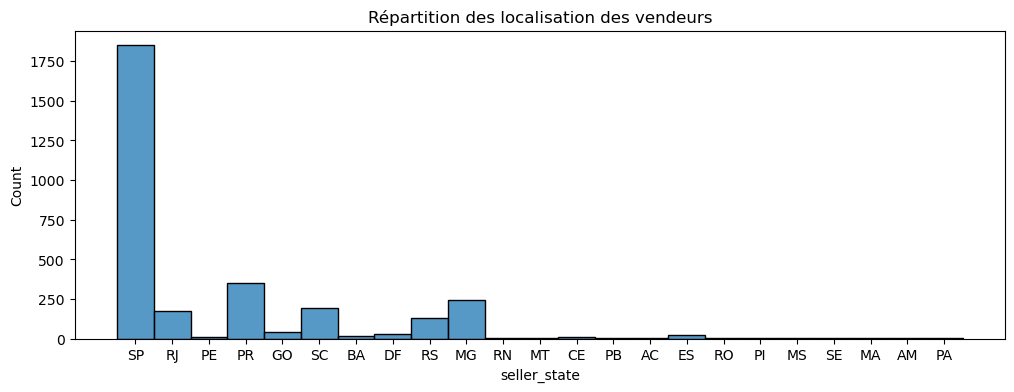

In [34]:
fig = plt.figure(figsize=(12, 4))
sns.histplot(data=df_sellers, x="seller_state", discrete=True)
plt.title(f"Répartition des localisation des vendeurs")
plt.show()

### Les commentaires

In [35]:
structure_df(df=df_order_reviews)

count  nunique   NbNa  \
review_id                99224    98410      0   
order_id                 99224    98673      0   
review_score             99224        5      0   
review_comment_title     99224     4527  87656   
review_comment_message   99224    36159  58247   
review_creation_date     99224      636      0   
review_answer_timestamp  99224    98248      0   

                                                     top1  freq1  \
review_id                7b606b0d57b078384f0b58eac1d41d78      3   
order_id                 c88b1d1b157a9999ce368f218a407141      3   
review_score                                            5  57328   
review_comment_title                            Recomendo    423   
review_comment_message                          Muito bom    230   
review_creation_date                  2017-12-19 00:00:00    463   
review_answer_timestamp               2017-06-15 23:21:05      4   

                                                     top2  freq2   Dtype  
review_id                dbdf1ea31790c8ecfcc6750525661a9b      3  object  
order_id                 8e17072ec97ce29f0e1f111e598b0c85      3  object  
review_score                                            4  19142   int64  
review_comment_title                            recomendo    345  object  
review_comment_message                                Bom    189  object  
review_creation_date                  2018-08-28 00:00:00    452  object  
review_answer_timestamp               2018-02-26 15:53:18      3  object

Toutes les commandes n'ont pas reçu de commentaires, (il y a 98673 order_id alors que au total 99441 commandes effectuées </br>
On conservera order_id, review_id (pour obternir le nombre de message par commande), ainsi que le score le plus récent
</br>
<font color='red'>Pas de valeurs manquantes.</font>

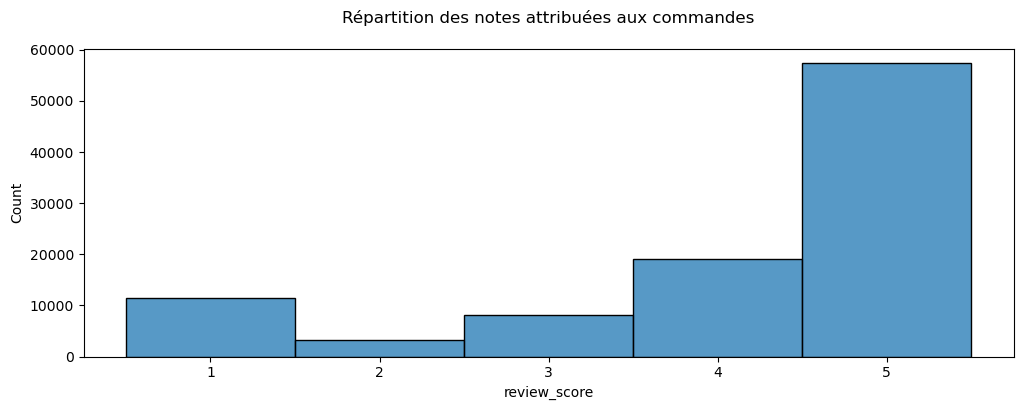

In [36]:
fig = plt.figure(figsize=(12, 4))
sns.histplot(data=df_order_reviews, x="review_score", discrete=True)
plt.title(f"Répartition des notes attribuées aux commandes\n")
plt.show()

### Les Traductions

In [37]:
structure_df(df=df_category_name)

count  nunique  NbNa           top1  freq1  \
product_category_name             71       71     0   beleza_saude      1   
product_category_name_english     71       71     0  health_beauty      1   

                                    top2  freq2   Dtype  
product_category_name          alimentos      1  object  
product_category_name_english       food      1  object

<font color='blue'>Nothing special</font></br>
<font color='red'>Pas de valeurs manquantes.</font>

### Les geolocalisations

In [38]:
structure_df(df=df_geolocation)

count  nunique  NbNa       top1   freq1  \
geolocation_zip_code_prefix  1000163    19015     0      24220    1146   
geolocation_lat              1000163   717360     0 -27.102099     314   
geolocation_lng              1000163   717613     0 -48.629613     314   
geolocation_city             1000163     8011     0  sao paulo  135800   
geolocation_state            1000163       27     0         SP  404268   

                                       top2   freq2    Dtype  
geolocation_zip_code_prefix           24230    1102    int64  
geolocation_lat                  -23.495901     190  float64  
geolocation_lng                  -46.874687     190  float64  
geolocation_city             rio de janeiro   62151   object  
geolocation_state                        MG  126336   object

Vu que les données ont été anonymisées, nous ne pourrons obtenir qu'une localisation biaisé de la liste des vendeurs et des clients </br></br>
<font color='red'>Pas de valeurs manquantes.</font>

</br>

</br>

</br>

## <font color='teal'> Creation de notre Jeux de Données</font>

Commençons par nettoyer le jeu de donnée localisation.
Il est actuellemnt composé de plusieurs doublons de zip_code

In [39]:
df_geolocation.geolocation_state.unique()

array(['SP', 'RN', 'AC', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'RS', 'PR', 'SC'], dtype=object)

Super il n'y a rien à faire

In [40]:
df_geolocation.groupby(['geolocation_city'])['geolocation_zip_code_prefix'].nunique()

geolocation_city
* cidade              1
...arraial do cabo    1
4o. centenario        1
4º centenario         1
abadia de goias       1
                     ..
áurea                 1
ângulo                1
érico cardoso         1
óbidos                1
óleo                  1
Name: geolocation_zip_code_prefix, Length: 8011, dtype: int64

<div class="alert alert-danger">Le champs city comtient enormément d'accents, en ceà réside toute la beauté des langues latines!!!</div>

In [41]:
df_order_items.merge(df_sellers,on="seller_id",how='left')\
.merge(df_geolocation\
       .rename(columns={'geolocation_zip_code_prefix':"seller_zip_code_prefix",'geolocation_city':"seller_city",'geolocation_state':"seller_state"}), 
       on=["seller_zip_code_prefix","seller_city","seller_state"],how='left')\
.drop(columns=['seller_zip_code_prefix', 'seller_city', 'seller_state'])\
.drop_duplicates()\
.groupby(['order_id']).aggregate({'geolocation_lat':'nunique'})\
.value_counts().sort_index()
#reset_index().notna().sum()

geolocation_lat
0                  2647
1                   106
2                   195
3                    17
4                   523
                   ... 
726                  17
794                   1
853                   1
865                   1
1056                  1
Length: 439, dtype: int64

<div class="alert alert-success">unidecode.unidecode est tres utiles pour supprimer les accents.</div>

In [42]:
import unidecode
import re

localisation = df_geolocation.copy()
localisation['cityClean'] = [re.sub(r'[^\w\s]','',unidecode.unidecode(s.replace(' ','').lower()) ) for s in localisation.geolocation_city]

In [43]:
#creer centroid de position geographique
localisation[['meanLat','meanLng']] = localisation.groupby(['geolocation_zip_code_prefix','cityClean','geolocation_state'])\
[['geolocation_lat','geolocation_lng']]\
.transform('mean')

localisation = localisation[['geolocation_zip_code_prefix','geolocation_state','geolocation_city','cityClean','meanLat','meanLng']]\
.drop_duplicates()

In [44]:
localisation['geolocation_city'].nunique(),localisation['cityClean'].nunique()

(8011, 5901)

In [45]:
# test 
id_test = np.random.choice(localisation.shape[0],10,replace=False)
print(localisation.iloc[id_test][['geolocation_city','cityClean']])
del id_test

            geolocation_city          cityClean
711990                recife             recife
680819      lauro de freitas     laurodefreitas
726935   barra de sao miguel   barradesaomiguel
919064             araranguá          ararangua
540629            sao mateus          saomateus
106878             são paulo           saopaulo
315073                araras             araras
374594           herculandia        herculandia
355221       três fronteiras     tresfronteiras
858732  sao jose dos pinhais  saojosedospinhais


Cela semble etre corrigé, d'une certaine façon

### Création de notre dataframe

<font color='blue'>Tout dabord créons un new dataframe possédant la liste des clients en ajoutant la position geographique au dataset.</font></br>

In [46]:
#Client localisation
clients = df_customers.copy()
clients['cityClean'] = [re.sub(r'[^\w\s]','',unidecode.unidecode(s.replace(' ','').lower()) ) for s in clients.customer_city]

clients = clients.merge(localisation.drop(columns=['geolocation_city']).rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix',
                                                     'geolocation_state':'customer_state',
                                                     'meanLat':'customer_meanLat','meanLng':'customer_meanLng'}),
                        on=['customer_zip_code_prefix','customer_state','cityClean'],how='left').drop_duplicates()

In [47]:
df_customers.shape,clients.shape

((99441, 5), (99441, 8))

<font color='blue'>Ensuite fusion avec le dataset des commande df_order</font></br>

In [48]:
clients = clients.merge(df_orders[['order_id','customer_id','order_status','order_purchase_timestamp','delai_livraison']],
                   on = 'customer_id', how = 'left')

#,'order_delivered_customer_date'
#Supprimer les commandes non encore delivred

# Suppression des colonnes de geo inutile
clients = clients.drop(columns=['customer_zip_code_prefix','customer_city','customer_state','cityClean']).drop_duplicates() #order_status

In [49]:
df_customers.shape,clients.shape

((99441, 5), (99441, 8))

In [50]:
clients.isna().sum()

customer_id                    0
customer_unique_id             0
customer_meanLat             302
customer_meanLng             302
order_id                    1234
order_status                1234
order_purchase_timestamp    1234
delai_livraison             1234
dtype: int64

Existe-til des cliens sans qui n'ont de ref commande associé ds df_orders?

In [51]:
print('{} customer_id du dataset df_customers sans correspondance dans le dataset df_orders.'.format(np.sum(~df_customers.customer_id.isin(df_orders.customer_id))) )

1234 customer_id du dataset df_customers sans correspondance dans le dataset df_orders.


<div class="alert alert-danger">Donc on a 625 customer_id sans commandes associées.</div>

In [52]:
clients = clients.loc[clients.order_id.notna()]
clients.shape

(98207, 8)

<font color='blue'>Creons le dataset items</font></br>

In [53]:
items = df_order_items.copy()

# Creons le nombre d'article Total| Le nombre d'article unique | Le prix total des articles | La somme Total des montant de fret
items = items.groupby(['order_id'])\
.aggregate({'order_item_id':'max','product_id':'nunique','price':'sum','freight_value':'sum'})\
.rename(columns={'order_item_id':'NbreDarticleTotal','product_id':'NbreArticleUnique','price':'PriceTotal','freight_value':'FreightTotal'}).reset_index()\
.drop_duplicates()
# peut etre add sum price et sum freight => obtenir %price et % freight
items['pourc_freight'] = items['FreightTotal']/(items['PriceTotal']+items['FreightTotal'])
items.drop(columns=['PriceTotal','PriceTotal'],inplace=True)

In [54]:
structure_df(items)

count  nunique  NbNa                              top1  \
order_id           98666    98666     0  00010242fe8c5a6d1ba2dd792cb16214   
NbreDarticleTotal  98666       17     0                                 1   
NbreArticleUnique  98666        8     0                                 1   
FreightTotal       98666     7970     0                              15.1   
pourc_freight      98666    44575     0                               0.0   

                   freq1                              top2  freq2    Dtype  
order_id               1  ab13cb6c13063f2603a94c9ddca34f66      1   object  
NbreDarticleTotal  88863                                 2   7516    int64  
NbreArticleUnique  95430                                 2   2846    int64  
FreightTotal        2952                              7.78   1839  float64  
pourc_freight        338                          0.227794    327  float64

## <font color='blue'>Fusion des datasets clients et items</font></br>

In [55]:
clients = clients.merge(items,on = ['order_id'],how = 'left')

In [56]:
structure_df(clients)

count  nunique  NbNa  \
customer_id               98207    98207     0   
customer_unique_id        98207    94990     0   
customer_meanLat          98207    14828   298   
customer_meanLng          98207    14828   298   
order_id                  98207    98207     0   
order_status              98207        6     0   
order_purchase_timestamp  98207    97655     0   
delai_livraison           98207      147     0   
NbreDarticleTotal         98207       17     8   
NbreArticleUnique         98207        8     8   
FreightTotal              98207     7946     8   
pourc_freight             98207    44348     8   

                                                      top1  freq1  \
customer_id               06b8999e2fba1a1fbc88172c00ba8bc7      1   
customer_unique_id        8d50f5eadf50201ccdcedfb9e2ac8455     16   
customer_meanLat                                -23.012987    140   
customer_meanLng                                 -43.46552    140   
order_id                  00e7ee1b050b8499577073aeb2a297a1      1   
order_status                                     delivered  96478   
order_purchase_timestamp               2018-04-11 10:48:14      3   
delai_livraison                                        7.0   7659   
NbreDarticleTotal                                      1.0  88438   
NbreArticleUnique                                      1.0  94968   
FreightTotal                                          15.1   2942   
pourc_freight                                          0.0    338   

                                                      top2  freq2  \
customer_id               f27c2fc8a0cd988fff5e1e766dd16e67      1   
customer_unique_id        3e43e6105506432c953e165fb2acf44c      9   
customer_meanLat                                -22.903245    120   
customer_meanLng                                -43.107024    120   
order_id                  a833470057703c13293c5d7c2bd5bd05      1   
order_status                                       shipped   1107   
order_purchase_timestamp               2017-11-20 11:46:30      3   
delai_livraison                                        6.0   6810   
NbreDarticleTotal                                      2.0   7489   
NbreArticleUnique                                      2.0   2841   
FreightTotal                                          7.78   1824   
pourc_freight                                     0.227794    327   

                                   Dtype  
customer_id                       object  
customer_unique_id                object  
customer_meanLat                 float64  
customer_meanLng                 float64  
order_id                          object  
order_status                      object  
order_purchase_timestamp  datetime64[ns]  
delai_livraison                  float64  
NbreDarticleTotal                float64  
NbreArticleUnique                float64  
FreightTotal                     float64  
pourc_freight                    float64

### Regroupement selon WALMART

<font color='blue'>Encoder les categories de produits</font></br>

In [57]:
## Homogénisation des category de produit
dico = {
    # Clothing, Shoes & Accessories
    'fashion_childrens_clothes' : 'fashion',     'fashion_male_clothing' : 'fashion', 
    'fashion_shoes' : 'fashion',              'fashion_bags_accessories' : 'fashion', 
    'fashion_underwear_beach' : 'fashion',     'fashio_female_clothing' : 'fashion',

    # Books
    'books_general_interest' : 'books',  'books_technical' : 'books', 'books_imported' : 'books',

    # Movies & TV Shows
    'dvds_blu_ray'   : 'Movies_TV_Shows', 'cine_photo'     : 'Movies_TV_Shows',

    # Music & Vinyl
    'audio' : 'music',     'cds_dvds_musicals' : 'music', 'musical_instruments' : 'music', #'music', 


    # Arts, Crafts, Sewing & Party Supplies
    'art' : 'Arts_Crafts_Sewing_Party_Supplies', 
    'arts_and_craftmanship' : 'Arts_Crafts_Sewing_Party_Supplies', 
    'party_supplies' : 'Arts_Crafts_Sewing_Party_Supplies', 
    'flowers' : 'Arts_Crafts_Sewing_Party_Supplies', 
    'cool_stuff' : 'Arts_Crafts_Sewing_Party_Supplies',
    'watches_gifts' : 'Arts_Crafts_Sewing_Party_Supplies',

    # Auto, Tires & Industrial & Construction Tools
    'construction_tools_lights' : 'Auto_Tires_Industrial_Construction_Tools',
    'construction_tools_safety' : 'Auto_Tires_Industrial_Construction_Tools',
    'construction_tools_construction' : 'Auto_Tires_Industrial_Construction_Tools',
    'costruction_tools_tools' : 'Auto_Tires_Industrial_Construction_Tools',
    'auto' : 'Auto_Tires_Industrial_Construction_Tools', 
    'agro_industry_and_commerce' : 'Auto_Tires_Industrial_Construction_Tools', 
    'industry_commerce_and_business' : 'Auto_Tires_Industrial_Construction_Tools',

    # Patio & Garden
    #'garden_tools', 

    # Toys & Outdoor Play
    #'toys', 

    # Baby
    #'baby', 

    # Electronics 
    'consoles_games' : 'electronics',     'computers_accessories' : 'electronics', 
    'computers' : 'electronics',     'fixed_telephony' : 'electronics',  'telephony' : 'electronics', #'electronics', 

    # Grocery
    'drinks':'food_drink', 'food':'food_drink', #'food_drink',

    # Household Essentials
    #'housewares',

    # Pets
    #'pet_shop',

    # Sports & Outdoors
    'sports_leisure':'sports', 'fashion_sport':'sports', 

    # Stationery & Office Supplies
    'stationery' : 'stationery_office_furniture', 'office_furniture' : 'stationery_office_furniture', 
    'tablets_printing_image' : 'stationery_office_furniture',

    # Home, Furniture & Appliances
    'home_appliances' : 'Home_Furniture_Appliances',     
    'home_appliances_2' : 'Home_Furniture_Appliances', 
    'home_confort' : 'Home_Furniture_Appliances', 
    'home_comfort_2' : 'Home_Furniture_Appliances',
    'home_construction' : 'Home_Furniture_Appliances', 
    'kitchen_dining_laundry_garden_furniture' : 'Home_Furniture_Appliances', 
    'luggage_accessories' : 'Home_Furniture_Appliances', 
    'furniture_living_room' : 'Home_Furniture_Appliances', 
    'furniture_decor' : 'Home_Furniture_Appliances',
    'furniture_bedroom' : 'Home_Furniture_Appliances', 
    'furniture_mattress_and_upholstery' : 'Home_Furniture_Appliances',
    'christmas_supplies' : 'Home_Furniture_Appliances', 
    'small_appliances_home_oven_and_coffee' : 'Home_Furniture_Appliances',
    'small_appliances' : 'Home_Furniture_Appliances', 
    'bed_bath_table' : 'Home_Furniture_Appliances', 


    # Beauty & Personal Care
    'health_beauty' : 'Beauty_Personal_Care', 'diapers_and_hygiene' : 'Beauty_Personal_Care', 
    'perfumery' : 'Beauty_Personal_Care', 


    # Home Improvement
    'air_conditioning' : 'Home_Improvement', 'signaling_and_security' : 'Home_Improvement',
    'security_and_services' : 'Home_Improvement',


    # Others 
    'market_place' : 'Others', 'la_cuisine' : 'Others',
}

       
df_category_name = df_category_name.replace({"product_category_name_english": dico})
del dico

In [58]:
### Create pivot_table de categorie_name
items_EngCatName = df_order_items.copy()

# Fusion des df items et products puis ajouts de la traduction en anglais
items_EngCatName = items_EngCatName\
.merge(df_products, on='product_id', how = 'left')\
.merge(df_category_name, on='product_category_name', how = 'left')\
.sort_values('order_item_id')[['order_id','product_category_name_english','price','freight_value']]\
.rename(columns = {'product_category_name_english':'Category'})

## Replace nan modalité par Others
items_EngCatName.loc[items_EngCatName.Category.isna(),'Category'] = 'Others'

# Renommer les modalités du champs category en les prefixant par cat_
items_EngCatName['Category'] = 'countCat_' + items_EngCatName['Category'].astype(str)

# Pivot_table du dataframe de somme des prix par category
items_EngCatName = pd.pivot_table(items_EngCatName, values= 'price', index=['order_id'],columns=['Category'], aggfunc=np.sum).reset_index().fillna(0)

#pd.pivot_table(df, values='D', index=['A', 'B'],columns=['C'], aggfunc=np.sum)

In [59]:
# Sample
items_EngCatName.loc[items_EngCatName.order_id.isin(['8272b63d03f5f79c56e9e4120aec44ef','1b15974a0141d54e36626dca3fdc731a'])]

Category                          order_id  \
10459     1b15974a0141d54e36626dca3fdc731a   
50137     8272b63d03f5f79c56e9e4120aec44ef   

Category  countCat_Arts_Crafts_Sewing_Party_Supplies  \
10459                                            0.0   
50137                                            0.0   

Category  countCat_Auto_Tires_Industrial_Construction_Tools  \
10459                                                   0.0   
50137                                                   0.0   

Category  countCat_Beauty_Personal_Care  countCat_Home_Furniture_Appliances  \
10459                               0.0                                 0.0   
50137                              31.8                                 0.0   

Category  countCat_Home_Improvement  countCat_Movies_TV_Shows  \
10459                           0.0                       0.0   
50137                           0.0                       0.0   

Category  countCat_Others  countCat_baby  countCat_books  ...  \
10459                 0.0            0.0             0.0  ...   
50137                 0.0            0.0             0.0  ...   

Category  countCat_electronics  countCat_fashion  countCat_food_drink  \
10459                   2000.0               0.0                  0.0   
50137                      0.0               0.0                  0.0   

Category  countCat_garden_tools  countCat_housewares  countCat_music  \
10459                       0.0                  0.0             0.0   
50137                       0.0                  0.0             0.0   

Category  countCat_pet_shop  countCat_sports  \
10459                   0.0              0.0   
50137                   0.0              0.0   

Category  countCat_stationery_office_furniture  countCat_toys  
10459                                      0.0            0.0  
50137                                      0.0            0.0  

[2 rows x 21 columns]

In [60]:
items_EngCatName.shape

(98666, 21)

In [61]:
items_EngCatName.isna().sum().value_counts()

0    21
dtype: int64

<font color='blue'>Convertir les variables categoriques en dummy/indicator. </font></br>

In [62]:
#test
items_DummyEngName = df_order_items.copy()\
.merge(df_products, on='product_id', how = 'left')\
.merge(df_category_name, on='product_category_name', how = 'left')\
.groupby(['order_id','product_category_name_english'])['product_id'].count()\
.reset_index()\
.rename(columns = {'product_category_name_english':'Category','product_id':'Effectif'})

## Replace nan modalité par Others
items_DummyEngName.loc[items_DummyEngName.Category.isna(),'Category'] = 'Others'

# Renommer les modalités du champs category en les prefixant par cat_
items_DummyEngName['Category'] = 'countCat_' + items_DummyEngName['Category'].astype(str)

# Pivot_table du dataframe de somme des prix par category
items_DummyEngName = pd.pivot_table(items_DummyEngName, values = 'Effectif',
                                    index=['order_id'],columns=['Category'], 
                                    aggfunc=np.sum).reset_index().fillna(0)

#pd.pivot_table(df, values='D', index=['A', 'B'],columns=['C'], aggfunc=np.sum)

items_DummyEngName.loc[items_DummyEngName.order_id.isin(['98ffbd84c7dcfaca87f6a248719b9bb7','ab640e57ace8f9edd426ca8a503d3169'])]

Category                          order_id  \
57758     98ffbd84c7dcfaca87f6a248719b9bb7   
64908     ab640e57ace8f9edd426ca8a503d3169   

Category  countCat_Arts_Crafts_Sewing_Party_Supplies  \
57758                                            0.0   
64908                                            0.0   

Category  countCat_Auto_Tires_Industrial_Construction_Tools  \
57758                                                   0.0   
64908                                                   0.0   

Category  countCat_Beauty_Personal_Care  countCat_Home_Furniture_Appliances  \
57758                               0.0                                 2.0   
64908                               0.0                                 0.0   

Category  countCat_Home_Improvement  countCat_Movies_TV_Shows  \
57758                           0.0                       0.0   
64908                           0.0                       0.0   

Category  countCat_Others  countCat_baby  countCat_books  ...  \
57758                 0.0            0.0             0.0  ...   
64908                 0.0            1.0             0.0  ...   

Category  countCat_electronics  countCat_fashion  countCat_food_drink  \
57758                      0.0               0.0                  0.0   
64908                      0.0               0.0                  0.0   

Category  countCat_garden_tools  countCat_housewares  countCat_music  \
57758                       0.0                  0.0             0.0   
64908                       0.0                  0.0             0.0   

Category  countCat_pet_shop  countCat_sports  \
57758                   0.0              0.0   
64908                   0.0              0.0   

Category  countCat_stationery_office_furniture  countCat_toys  
57758                                      0.0            0.0  
64908                                      0.0            0.0  

[2 rows x 21 columns]

In [63]:
items_DummyEngName.shape

(97256, 21)

In [64]:
items_DummyEngName.isna().sum().value_counts()

0    21
dtype: int64

<font color='blue'>items Sellers</font></br>

<div class="alert alert-info">Ici nous voulons récuperer que la position geo.</div>

In [65]:
#seller localisation
vendeurs = df_sellers.copy()
vendeurs['cityClean'] = [s.split('/')[0].split(',')[0] for s in vendeurs.seller_city]
vendeurs['cityClean'] = [re.sub(r'[^\w\s]','',unidecode.unidecode(s.replace(' ','').lower()) ) for s in vendeurs.cityClean]

# Ajout de la localisation geographique
vendeurs = vendeurs.merge(localisation.drop(columns=['geolocation_city'])\
                          .rename(columns={'geolocation_zip_code_prefix':'seller_zip_code_prefix',
                                           'geolocation_state':'seller_state',
                                           'meanLat':'seller_meanLat', 'meanLng':'seller_meanLng'}),
                          on=['seller_zip_code_prefix','cityClean','seller_state'],how='left')

# Drop columns useless
vendeurs.drop(columns=['seller_zip_code_prefix','seller_city','seller_state','cityClean'],inplace=True)


# Ajout de l'order_id
vendeurs = vendeurs.merge(df_order_items[['order_id','seller_id']].drop_duplicates(),
                          on = 'seller_id',how = 'left').drop_duplicates()

# Drop columns & rows useless
vendeurs = vendeurs.drop(columns=['seller_id']).drop_duplicates()
vendeurs.dropna(inplace=True)


vendeurs.head()

seller_meanLat  seller_meanLng                          order_id
0      -22.893848      -47.061337  4a90af3e85dd563884e2afeab1091394
1      -22.893848      -47.061337  6d953888a914b67350d5bc4d48f2acab
2      -22.893848      -47.061337  bc8a5de6abf5b14f98a6135a7fb46731
3      -22.383437      -46.947927  035201c3c82a97f8a25dd6bd5244b2d5
4      -22.383437      -46.947927  0504447548229e075dea8441b37b1e2a

In [66]:
structure_df(vendeurs)

count  nunique  NbNa                              top1  freq1  \
seller_meanLat  97795     2178     0                        -21.757321   6565   
seller_meanLng  97795     2178     0                        -48.829744   6565   
order_id        97795    96651     0  cf5c8d9f52807cb2d2f0a0ff54c478da      5   

                                            top2  freq2    Dtype  
seller_meanLat                        -23.652366   1868  float64  
seller_meanLng                        -46.755753   1868  float64  
order_id        1c11d0f4353b31ac3417fbfa5f0f2a8a      4   object

<div class="alert alert-info">Une commande peut contenir plusieurs articles vendus par differents vendeurs dont les emplacement diffèrent.</br>
On ne conservera que la plus grande afin de conserver une ligne par client.</div>

In [67]:
vendeurs = vendeurs.groupby(['order_id']).max()
vendeurs = vendeurs.rename(columns={'seller_meanLat':'seller_MaxMeanLat','seller_meanLng':'seller_MaxMeanLng'}).reset_index()
vendeurs.shape

(96651, 3)

## <font color='blue'>Ajout de la localisation des vendeurs</font></br>

In [68]:
clients = clients.merge(vendeurs,on = 'order_id', how = 'left')
clients.sample(5)

customer_id                customer_unique_id  \
70776  91b3c3fbfcdbb9ad5a9f72324b8e4a9a  97ccf3e2a22c7979dc99e3cad4e0326c   
91411  652401990964326fac92dbdf8ebd673a  d06c02b1ffc8eec2c5a45d968354cb19   
14447  e2de9994c35478f475fdadaaf092ca51  30e3cbda9fcaf3df52716f1b7265341a   
11232  b06fdea956d8b0a32da0e6e8df86d347  3ba9aebc9d5d71ee57ceeb539ab75794   
88692  f241eda6e0ef48fb716e435126893b88  f0a0b65515c41c696eac8064eac4c2d5   

       customer_meanLat  customer_meanLng                          order_id  \
70776        -22.712262        -43.433978  6abfbfca6fe988d700c523b016c31838   
91411        -25.392188        -51.466967  0f884853f408247bc673050f33f2c5e5   
14447        -14.666464        -52.353931  382cc76dffc717f6f05ce8c2fba428bc   
11232        -23.419168        -47.416721  fcfc50a9520809adee86b167b0cf297e   
88692        -22.809518        -43.200203  5ee987cdf0ab5a1b320bbfae52b39661   

      order_status order_purchase_timestamp  delai_livraison  \
70776    delivered      2017-12-07 12:13:59             34.0   
91411    delivered      2017-08-11 14:40:12             10.0   
14447    delivered      2017-12-09 13:02:33             10.0   
11232     invoiced      2018-05-21 18:01:28             16.0   
88692    delivered      2017-03-08 19:29:16              7.0   

       NbreDarticleTotal  NbreArticleUnique  FreightTotal  pourc_freight  \
70776                1.0                1.0         17.66       0.230368   
91411                1.0                1.0         18.28       0.035000   
14447                1.0                1.0         25.59       0.061873   
11232                1.0                1.0          8.51       0.042891   
88692                1.0                1.0         18.66       0.257166   

       seller_MaxMeanLat  seller_MaxMeanLng  
70776         -20.806707         -49.389165  
91411         -23.595499         -46.559727  
14447         -22.757883         -47.417055  
11232         -22.914020         -47.013535  
88692         -19.805005         -44.013321

In [69]:
structure_df(clients)

count  nunique  NbNa  \
customer_id               98207    98207     0   
customer_unique_id        98207    94990     0   
customer_meanLat          98207    14828   298   
customer_meanLng          98207    14828   298   
order_id                  98207    98207     0   
order_status              98207        6     0   
order_purchase_timestamp  98207    97655     0   
delai_livraison           98207      147     0   
NbreDarticleTotal         98207       17     8   
NbreArticleUnique         98207        8     8   
FreightTotal              98207     7946     8   
pourc_freight             98207    44348     8   
seller_MaxMeanLat         98207     2151  2014   
seller_MaxMeanLng         98207     2154  2014   

                                                      top1  freq1  \
customer_id               06b8999e2fba1a1fbc88172c00ba8bc7      1   
customer_unique_id        8d50f5eadf50201ccdcedfb9e2ac8455     16   
customer_meanLat                                -23.012987    140   
customer_meanLng                                 -43.46552    140   
order_id                  00e7ee1b050b8499577073aeb2a297a1      1   
order_status                                     delivered  96478   
order_purchase_timestamp               2018-04-11 10:48:14      3   
delai_livraison                                        7.0   7659   
NbreDarticleTotal                                      1.0  88438   
NbreArticleUnique                                      1.0  94968   
FreightTotal                                          15.1   2942   
pourc_freight                                          0.0    338   
seller_MaxMeanLat                               -21.757321   6528   
seller_MaxMeanLng                               -48.829744   6436   

                                                      top2  freq2  \
customer_id               f27c2fc8a0cd988fff5e1e766dd16e67      1   
customer_unique_id        3e43e6105506432c953e165fb2acf44c      9   
customer_meanLat                                -22.903245    120   
customer_meanLng                                -43.107024    120   
order_id                  a833470057703c13293c5d7c2bd5bd05      1   
order_status                                       shipped   1107   
order_purchase_timestamp               2017-11-20 11:46:30      3   
delai_livraison                                        6.0   6810   
NbreDarticleTotal                                      2.0   7489   
NbreArticleUnique                                      2.0   2841   
FreightTotal                                          7.78   1824   
pourc_freight                                     0.227794    327   
seller_MaxMeanLat                               -23.652366   1833   
seller_MaxMeanLng                               -46.755753   1840   

                                   Dtype  
customer_id                       object  
customer_unique_id                object  
customer_meanLat                 float64  
customer_meanLng                 float64  
order_id                          object  
order_status                      object  
order_purchase_timestamp  datetime64[ns]  
delai_livraison                  float64  
NbreDarticleTotal                float64  
NbreArticleUnique                float64  
FreightTotal                     float64  
pourc_freight                    float64  
seller_MaxMeanLat                float64  
seller_MaxMeanLng                float64

<div class="alert alert-info"> Création de la colonne distance de livraison => dist entre clients et vendeurs.</div>

In [70]:
from haversine import haversine as hs
from haversine import Unit
clients['dist_livraison'] = [hs((xc,yc),(xs,ys),unit=Unit.METERS) for xc,yc,xs,ys in zip(clients.customer_meanLat,clients.customer_meanLng,clients.seller_MaxMeanLat,clients.seller_MaxMeanLng)]
clients.drop(columns=['customer_meanLat','customer_meanLng','seller_MaxMeanLat','seller_MaxMeanLng'],inplace=True)

In [71]:
clients.isna().sum()

customer_id                    0
customer_unique_id             0
order_id                       0
order_status                   0
order_purchase_timestamp       0
delai_livraison                0
NbreDarticleTotal              8
NbreArticleUnique              8
FreightTotal                   8
pourc_freight                  8
dist_livraison              2307
dtype: int64

<font color='blue'>Creation dataframe payments</font></br>

In [72]:
# Un payment d'une commande peut s'echelloner en plrs versements et par different type de paiement (cb-bon-billet-debit cart-)
payments = df_order_payments.groupby(['order_id'])\
.aggregate({'payment_sequential':'max','payment_type':'nunique','payment_installments':'sum','payment_value':'sum'})\
.rename(columns={'payment_sequential':'NbredeFractionPayment',
                 'payment_installments':'NbreEchelonPayement',
                 'payment_type':'NbreTypePayment',
                 'payment_value':'MontantCommande'}).reset_index()

payments.loc[df_order_payments.order_id=='1d3b8d78074e0b50f10346941e67e9de']

order_id  NbredeFractionPayment  \
22174  3923e3ade70348985bd2ca389905cf19                      1   
67624  ae94c1cc378bdf3a430f77809a22ee67                      1   
92385  edc07d2563b2d10bdf1a0376f65b8f76                      1   

       NbreTypePayment  NbreEchelonPayement  MontantCommande  
22174                1                    1            78.15  
67624                1                    1           272.95  
92385                1                    1            28.23

In [73]:
structure_df(payments)

count  nunique  NbNa                              top1  \
order_id               99440    99440     0  00010242fe8c5a6d1ba2dd792cb16214   
NbredeFractionPayment  99440       20     0                                 1   
NbreTypePayment        99440        2     0                                 1   
NbreEchelonPayement    99440       27     0                                 1   
MontantCommande        99440    27979     0                             77.57   

                       freq1                              top2  freq2    Dtype  
order_id                   1  ab2830d9aa052d7aee54359bc3f61d0c      1   object  
NbredeFractionPayment  96401                                 2   2458    int64  
NbreTypePayment        97194                                 2   2246    int64  
NbreEchelonPayement    46266                                 2  13605    int64  
MontantCommande          254                              35.0    169  float64

In [74]:
structure_df(df_order_payments)

count  nunique  NbNa                              top1  \
order_id              103886    99440     0  fa65dad1b0e818e3ccc5cb0e39231352   
payment_sequential    103886       29     0                                 1   
payment_type          103886        5     0                       credit_card   
payment_installments  103886       23     0                                 1   
payment_value         103886    29077     0                              50.0   

                      freq1                              top2  freq2    Dtype  
order_id                 29  ccf804e764ed5650cd8759557269dc13     26   object  
payment_sequential    99360                                 2   3039    int64  
payment_type          76795                            boleto  19784   object  
payment_installments  52548                                 2  12413    int64  
payment_value           324                              20.0    274  float64

In [75]:
type_payment = pd.pivot_table(df_order_payments.copy()\
                   .groupby(['order_id','payment_type'])['payment_value'].sum().reset_index(), 
                   values='payment_value', index='order_id', columns='payment_type', aggfunc='sum', 
                   fill_value=0, margins=True, dropna=True, margins_name='All', 
                   observed=False, sort=True)

for c in type_payment.columns:
    #print(c)
    type_payment[c] = type_payment[c]/type_payment["All"]
    
    
type_payment = type_payment.reset_index().reset_index()
type_payment.drop(columns=['index','All'],inplace=True)
type_payment.loc[type_payment.order_id=="00c405bd71187154a7846862f585a9d4"]

payment_type                          order_id  boleto  credit_card  \
282           00c405bd71187154a7846862f585a9d4     0.0      0.12915   

payment_type  debit_card  not_defined  voucher  
282                  0.0          0.0  0.87085

In [76]:
type_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     99441 non-null  object 
 1   boleto       99438 non-null  float64
 2   credit_card  99438 non-null  float64
 3   debit_card   99438 non-null  float64
 4   not_defined  99438 non-null  float64
 5   voucher      99438 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.6+ MB


In [77]:
### Suppression des valeurs de commande completements manquantes
type_payment = type_payment.loc[type_payment.boleto.notna()]

In [78]:
type_payment.reset_index().index

RangeIndex(start=0, stop=99438, step=1)

## <font color='blue'> Fusion des datasets clients et items</font></br>

In [79]:
clients = clients.merge(payments,on = 'order_id', how = 'left')

In [80]:
clients.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

   delai_livraison  NbreDarticleTotal  NbreArticleUnique  FreightTotal  \
0              8.0                1.0                1.0         21.88   
1             16.0                1.0                1.0         46.48   
2             26.0                1.0                1.0         17.79   
3             14.0                1.0                1.0         23.36   
4             11.0                1.0                1.0         22.25   

   pourc_freight  dist_livraison  NbredeFractionPayment  NbreTypePayment  \
0       0.148975   348771.137710                    1.0              1.0   
1       0.138548   413832.308052                    1.0              1.0   
2       0.112788    29956.896184                    1.0              1.0   
3       0.134795    18569.369317                    1.0              1.0   
4       0.088206   220047.575085                    1.0              1.0   

   NbreEchelonPayement  MontantCommande  
0                  2.0           146.87  
1                  8.0           335.48  
2                  7.0           157.73  
3                  1.0           173.30  
4                  8.0           252.25

In [81]:
structure_df(clients)

count  nunique  NbNa  \
customer_id               98207    98207     0   
customer_unique_id        98207    94990     0   
order_id                  98207    98207     0   
order_status              98207        6     0   
order_purchase_timestamp  98207    97655     0   
delai_livraison           98207      147     0   
NbreDarticleTotal         98207       17     8   
NbreArticleUnique         98207        8     8   
FreightTotal              98207     7946     8   
pourc_freight             98207    44348     8   
dist_livraison            98207    90120  2307   
NbredeFractionPayment     98207       20     1   
NbreTypePayment           98207        2     1   
NbreEchelonPayement       98207       27     1   
MontantCommande           98207    27754     1   

                                                      top1  freq1  \
customer_id               06b8999e2fba1a1fbc88172c00ba8bc7      1   
customer_unique_id        8d50f5eadf50201ccdcedfb9e2ac8455     16   
order_id                  00e7ee1b050b8499577073aeb2a297a1      1   
order_status                                     delivered  96478   
order_purchase_timestamp               2018-04-11 10:48:14      3   
delai_livraison                                        7.0   7659   
NbreDarticleTotal                                      1.0  88438   
NbreArticleUnique                                      1.0  94968   
FreightTotal                                          15.1   2942   
pourc_freight                                          0.0    338   
dist_livraison                                         0.0     22   
NbredeFractionPayment                                  1.0  95209   
NbreTypePayment                                        1.0  95995   
NbreEchelonPayement                                    1.0  45643   
MontantCommande                                      77.57    254   

                                                      top2  freq2  \
customer_id               f27c2fc8a0cd988fff5e1e766dd16e67      1   
customer_unique_id        3e43e6105506432c953e165fb2acf44c      9   
order_id                  a833470057703c13293c5d7c2bd5bd05      1   
order_status                                       shipped   1107   
order_purchase_timestamp               2017-11-20 11:46:30      3   
delai_livraison                                        6.0   6810   
NbreDarticleTotal                                      2.0   7489   
NbreArticleUnique                                      2.0   2841   
FreightTotal                                          7.78   1824   
pourc_freight                                     0.227794    327   
dist_livraison                                10536.887047     15   
NbredeFractionPayment                                  2.0   2425   
NbreTypePayment                                        2.0   2211   
NbreEchelonPayement                                    2.0  13463   
MontantCommande                                       35.0    166   

                                   Dtype  
customer_id                       object  
customer_unique_id                object  
order_id                          object  
order_status                      object  
order_purchase_timestamp  datetime64[ns]  
delai_livraison                  float64  
NbreDarticleTotal                float64  
NbreArticleUnique                float64  
FreightTotal                     float64  
pourc_freight                    float64  
dist_livraison                   float64  
NbredeFractionPayment            float64  
NbreTypePayment                  float64  
NbreEchelonPayement              float64  
MontantCommande                  float64

<font color='blue'>Creation dataframe commentaires</font></br>

In [82]:
# Recupere la moyenne des notes(score liée à une commande) la plus récente
df_order_reviewsScore = df_order_reviews.copy()\
.groupby(['order_id','review_creation_date'])\
.aggregate({'review_score':'mean'})\
.reset_index()\
.sort_values(['review_creation_date'])\
.groupby(['order_id'])\
.last().reset_index().rename(columns={'review_score':'LastMeanScore'})


#Compte le nombre de message ecrit par le client par commande
df_order_reviewsCommentNbr = df_order_reviews.copy()\
.groupby(['order_id'])\
.aggregate({'review_comment_message':'count'})\
.rename(columns={'review_comment_message':'NbreComment'})\
.reset_index()


#Fusion des 2 dataframe
commentaires = df_order_reviewsScore\
.merge(df_order_reviewsCommentNbr,on = 'order_id')

# drop useless columns
commentaires.drop(columns=['review_creation_date'],inplace=True)

print(df_order_reviews.loc[ df_order_reviews.order_id=='8e17072ec97ce29f0e1f111e598b0c85' ])
print(commentaires.loc[ df_order_reviewsScore.order_id=='8e17072ec97ce29f0e1f111e598b0c85' ])
#.last()

                              review_id                          order_id  \
44694  67c2557eb0bd72e3ece1e03477c9dff5  8e17072ec97ce29f0e1f111e598b0c85   
64510  2d6ac45f859465b5c185274a1c929637  8e17072ec97ce29f0e1f111e598b0c85   
92300  6e4c4086d9611ae4cc0cc65a262751fe  8e17072ec97ce29f0e1f111e598b0c85   

       review_score review_comment_title  \
44694             1                  NaN   
64510             1                  NaN   
92300             1                  NaN   

                                  review_comment_message review_creation_date  \
44694                         Entregou o produto errado.  2018-04-07 00:00:00   
64510  Comprei 3 unidades do produto vieram 2 unidade...  2018-04-07 00:00:00   
92300  Embora tenha entregue dentro do prazo, não env...  2018-04-14 00:00:00   

      review_answer_timestamp  
44694     2018-04-08 22:48:27  
64510     2018-04-07 21:13:05  
92300     2018-04-16 11:37:31  
                               order_id  LastMeanScore  NbreC

In [83]:
structure_df(commentaires)

count  nunique  NbNa                              top1  freq1  \
order_id       98673    98673     0  00010242fe8c5a6d1ba2dd792cb16214      1   
LastMeanScore  98673        8     0                               5.0  56990   
NbreComment    98673        4     0                                 0  57837   

                                           top2  freq2    Dtype  
order_id       ab0e35dd7151f7e3d72931b940b6a335      1   object  
LastMeanScore                               4.0  19035  float64  
NbreComment                                   1  40696    int64

## <font color='blue'> Fusion des datasets clients et commentaires</font></br>

In [84]:
clients = clients.merge(commentaires,on = 'order_id'  , how = 'left')

In [85]:
structure_df(clients)

count  nunique  NbNa  \
customer_id               98207    98207     0   
customer_unique_id        98207    94990     0   
order_id                  98207    98207     0   
order_status              98207        6     0   
order_purchase_timestamp  98207    97655     0   
delai_livraison           98207      147     0   
NbreDarticleTotal         98207       17     8   
NbreArticleUnique         98207        8     8   
FreightTotal              98207     7946     8   
pourc_freight             98207    44348     8   
dist_livraison            98207    90120  2307   
NbredeFractionPayment     98207       20     1   
NbreTypePayment           98207        2     1   
NbreEchelonPayement       98207       27     1   
MontantCommande           98207    27754     1   
LastMeanScore             98207        8   734   
NbreComment               98207        4   734   

                                                      top1  freq1  \
customer_id               06b8999e2fba1a1fbc88172c00ba8bc7      1   
customer_unique_id        8d50f5eadf50201ccdcedfb9e2ac8455     16   
order_id                  00e7ee1b050b8499577073aeb2a297a1      1   
order_status                                     delivered  96478   
order_purchase_timestamp               2018-04-11 10:48:14      3   
delai_livraison                                        7.0   7659   
NbreDarticleTotal                                      1.0  88438   
NbreArticleUnique                                      1.0  94968   
FreightTotal                                          15.1   2942   
pourc_freight                                          0.0    338   
dist_livraison                                         0.0     22   
NbredeFractionPayment                                  1.0  95209   
NbreTypePayment                                        1.0  95995   
NbreEchelonPayement                                    1.0  45643   
MontantCommande                                      77.57    254   
LastMeanScore                                          5.0  56888   
NbreComment                                            0.0  57457   

                                                      top2  freq2  \
customer_id               f27c2fc8a0cd988fff5e1e766dd16e67      1   
customer_unique_id        3e43e6105506432c953e165fb2acf44c      9   
order_id                  a833470057703c13293c5d7c2bd5bd05      1   
order_status                                       shipped   1107   
order_purchase_timestamp               2017-11-20 11:46:30      3   
delai_livraison                                        6.0   6810   
NbreDarticleTotal                                      2.0   7489   
NbreArticleUnique                                      2.0   2841   
FreightTotal                                          7.78   1824   
pourc_freight                                     0.227794    327   
dist_livraison                                10536.887047     15   
NbredeFractionPayment                                  2.0   2425   
NbreTypePayment                                        2.0   2211   
NbreEchelonPayement                                    2.0  13463   
MontantCommande                                       35.0    166   
LastMeanScore                                          4.0  18990   
NbreComment                                            1.0  39877   

                                   Dtype  
customer_id                       object  
customer_unique_id                object  
order_id                          object  
order_status                      object  
order_purchase_timestamp  datetime64[ns]  
delai_livraison                  float64  
NbreDarticleTotal                float64  
NbreArticleUnique                float64  
FreightTotal                     float64  
pourc_freight                    float64  
dist_livraison                   float64  
NbredeFractionPayment            float64  
NbreTypePayment                  float64  
NbreEchelonPayement              floa

## <font color='blue'> Fusion des datasets clients et Categories de produits</font></br>

In [86]:
clients = clients.merge(items_EngCatName,on = 'order_id'  , how = 'left')

In [87]:
structure_df(clients)

count  nunique  NbNa  \
customer_id                                        98207    98207     0   
customer_unique_id                                 98207    94990     0   
order_id                                           98207    98207     0   
order_status                                       98207        6     0   
order_purchase_timestamp                           98207    97655     0   
delai_livraison                                    98207      147     0   
NbreDarticleTotal                                  98207       17     8   
NbreArticleUnique                                  98207        8     8   
FreightTotal                                       98207     7946     8   
pourc_freight                                      98207    44348     8   
dist_livraison                                     98207    90120  2307   
NbredeFractionPayment                              98207       20     1   
NbreTypePayment                                    98207        2     1   
NbreEchelonPayement                                98207       27     1   
MontantCommande                                    98207    27754     1   
LastMeanScore                                      98207        8   734   
NbreComment                                        98207        4   734   
countCat_Arts_Crafts_Sewing_Party_Supplies         98207     1345     8   
countCat_Auto_Tires_Industrial_Construction_Tools  98207     1352     8   
countCat_Beauty_Personal_Care                      98207     1880     8   
countCat_Home_Furniture_Appliances                 98207     2697     8   
countCat_Home_Improvement                          98207      226     8   
countCat_Movies_TV_Shows                           98207       57     8   
countCat_Others                                    98207      531     8   
countCat_baby                                      98207      576     8   
countCat_books                                     98207      256     8   
countCat_costruction_tools_garden                  98207      111     8   
countCat_electronics                               98207     2014     8   
countCat_fashion                                   98207      437     8   
countCat_food_drink                                98207      323     8   
countCat_garden_tools                              98207      711     8   
countCat_housewares                                98207     1359     8   
countCat_music                                     98207      359     8   
countCat_pet_shop                                  98207      546     8   
countCat_sports                                    98207     1388     8   
countCat_stationery_office_furniture               98207      747     8   
countCat_toys                                      98207      720     8   

                                                                               top1  \
customer_id                                        06b8999e2fba1a1fbc88172c00ba8bc7   
customer_unique_id                                 8d50f5eadf50201ccdcedfb9e2ac8455   
order_id                                           00e7ee1b050b8499577073aeb2a297a1   
order_status                                                              delivered   
order_purchase_timestamp                                        2018-04-11 10:48:14   
delai_livraison                                                                 7.0   
NbreDarticleTotal                                                               1.0   
NbreArticleUnique                                                               1.0   
FreightTotal                                                                   15.1   
pourc_freight                                                                   0.0   
dist_livraison                                                                  0.0   
NbredeFractionPayment                                                           1.0   
NbreTypePayment                                                      

In [88]:
(clients.PriceTotal/clients.loc[:,clients.columns.str.startswith('countCat_') ].apply(lambda x: x.sum(),axis = 1)).value_counts()

1.0    98190
1.0        4
1.0        3
1.0        2
dtype: int64

<div class="alert alert-success">Aucune erreur de montant n'a été généré lors de la création du dataframe client</div>

In [89]:
clients.columns[:-73]

Index([], dtype='object')

## <font color='blue'> RFM Recency Frequency Monetary</font></br>

In [90]:
clients['year'] = clients.order_purchase_timestamp.dt.year

In [91]:
df_recency = clients.groupby(by=['customer_unique_id'],
                        as_index=False)['order_purchase_timestamp'].max()
df_recency.columns = ['customer_unique_id', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

customer_unique_id    LastPurchaseDate  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      115
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      118
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      541
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      325
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      292

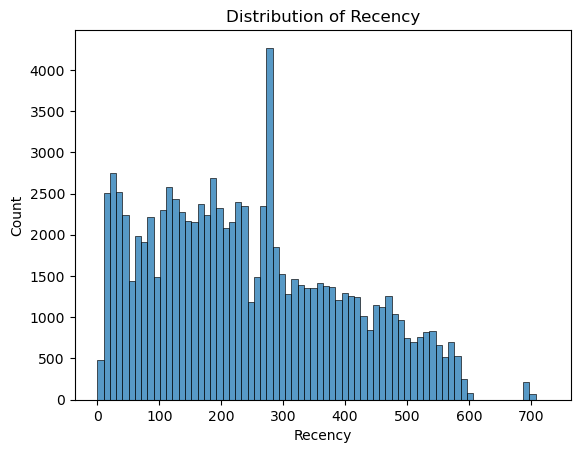

In [92]:
sns.histplot(data=df_recency, x="Recency")
plt.title("Distribution of Recency");

In [93]:
frequency_df = clients.drop_duplicates().groupby(
    by=['customer_unique_id'], as_index=False)['order_id'].count()
frequency_df.columns = ['customer_unique_id', 'Frequency']
frequency_df.head()

customer_unique_id  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

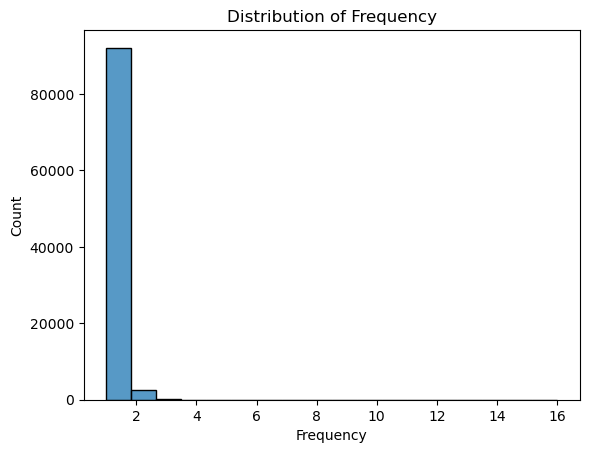

In [94]:
sns.histplot(data=frequency_df, x="Frequency")
plt.title("Distribution of Frequency");

In [95]:
frequency_df.Frequency.value_counts(normalize=True).round(6)*100

1     96.9597
2      2.7919
3      0.1979
4      0.0305
5      0.0095
6      0.0053
7      0.0032
9      0.0011
16     0.0011
Name: Frequency, dtype: float64

In [96]:
monetary_df = clients.groupby(by=['customer_unique_id'], as_index=False)['MontantCommande'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()

customer_unique_id  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2  0000f46a3911fa3c0805444483337064     86.22
3  0000f6ccb0745a6a4b88665a16c9f078     43.62
4  0004aac84e0df4da2b147fca70cf8255    196.89

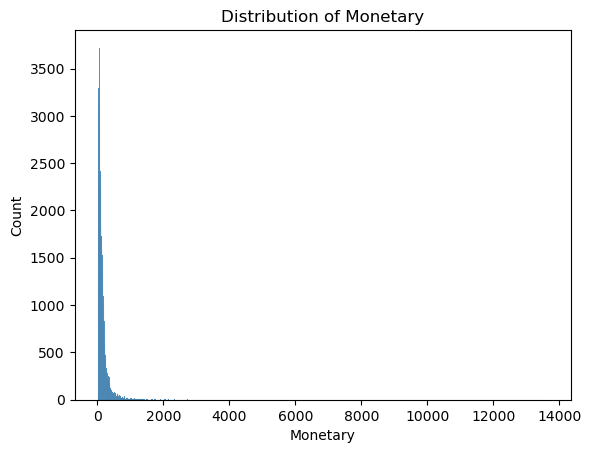

In [97]:
sns.histplot(data=monetary_df, x="Monetary")
plt.title("Distribution of Monetary");

In [98]:
monetary_df.describe()

Monetary
count  94990.000000
mean     165.692568
std      226.740288
min        0.000000
25%       63.100000
50%      107.900000
75%      182.940000
max    13664.080000

In [99]:
rf_df = df_recency.merge(frequency_df, on=['customer_unique_id'])
rfm_df = rf_df.merge(monetary_df, on=['customer_unique_id']).drop(
    columns='LastPurchaseDate')
rfm_df.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     27.19
2  0000f46a3911fa3c0805444483337064      541          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      292          1    196.89

In [100]:
structure_df(rfm_df)

count  nunique  NbNa                              top1  \
customer_unique_id  94990    94990     0  0000366f3b9a7992bf8c76cfdf3221e2   
Recency             94990      613     0                               282   
Frequency           94990        9     0                                 1   
Monetary            94990    28581     0                             77.57   

                    freq1                              top2  freq2    Dtype  
customer_unique_id      1  aa629fbe85e42dd198356871f8694e62      1   object  
Recency              1045                               283    431    int64  
Frequency           92102                                 2   2652    int64  
Monetary              242                              35.0    159  float64

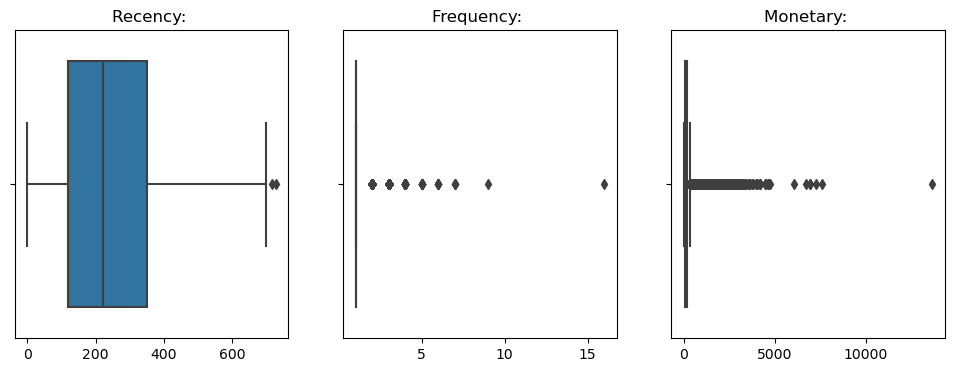

In [101]:
### Vitesse de livraison
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12, 4))

# Visualisation boxplot outliers
list1 = ['Recency','Frequency','Monetary']
for a,i in enumerate(list1):
    ax[a].set_title(str(i)+': ')
    sns.boxplot(x=rfm_df[str(i)],ax=ax[a])
    ax[a].set_xlabel("")
plt.show()

In [102]:
del rf_df,monetary_df,frequency_df,df_recency

In [103]:
from scipy import stats
import numpy as np
# remove the customer id column
new_df = rfm_df[['Recency','Frequency','Monetary']]
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

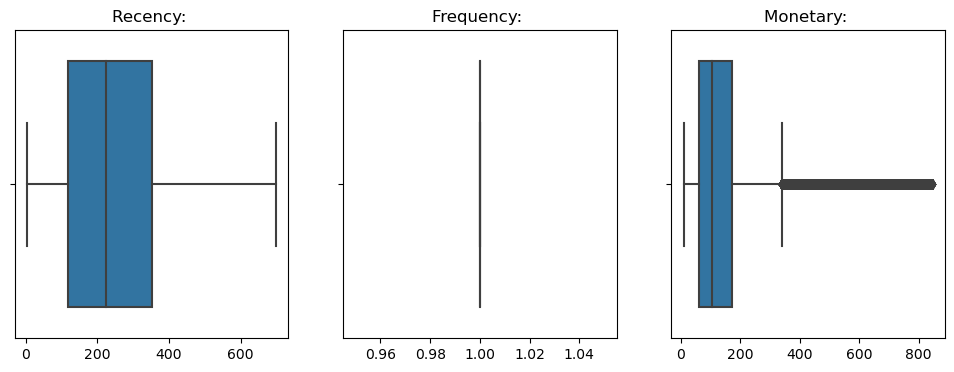

In [104]:
### Vitesse de livraison
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12, 4))

# Visualisation boxplot outliers
list1 = ['Recency','Frequency','Monetary']
for a,i in enumerate(list1):
    ax[a].set_title(str(i)+': ')
    sns.boxplot(x=new_df[str(i)],ax=ax[a])
    ax[a].set_xlabel("")
plt.show()

Il y a des outliers mais en les supprimant on met de coté <b><font color='red'>TOUS</font></b> les clients recurents.</br>
De plus, l'étude se porte sur l'ensemble des clients d'Otis.</br>
De ce fait, nous ne nous passerons d'aucune commande.

In [105]:
del new_df

In [106]:
rfm_df.corr()

Recency  Frequency  Monetary
Recency    1.000000  -0.021896 -0.003588
Frequency -0.021896   1.000000  0.121630
Monetary  -0.003588   0.121630  1.000000

## <font color='blue'> RFM Par années</font></br>

In [107]:
# Recence
df_recency = clients.groupby(by=['customer_unique_id','year'],as_index=False)['order_purchase_timestamp'].max()
df_recency.columns = ['customer_unique_id','year', 'LastPurchaseDate']

recent_date = clients.groupby(by=['year'])['order_purchase_timestamp'].max().reset_index()\
.rename(columns={'order_purchase_timestamp':'LastPurchaseYear'})

df_recency = df_recency.merge(recent_date, on = 'year',how = 'left')
#df_recency['Recency'] =( df_recency['LastPurchaseYear'] - df_recency['LastPurchaseDate']).days
#df_recency.drop(['LastPurchaseYear'],inplace=True)

df_recency['Recency'] =[y-d for y,d in zip(df_recency['LastPurchaseYear'],df_recency['LastPurchaseDate'])]

### frequence
frequency_df = clients.drop_duplicates().groupby(
    by=['customer_unique_id','year'], as_index=False)['order_purchase_timestamp'].count()
frequency_df.columns = ['customer_unique_id','year', 'Frequency']


#Montant
monetary_df = clients.groupby(by=['customer_unique_id','year'], as_index=False)['MontantCommande'].sum()
monetary_df.columns = ['customer_unique_id','year', 'Monetary']



rf_df = df_recency.merge(frequency_df, on=['customer_unique_id','year'])
rfm_df_year = rf_df.merge(monetary_df, on=['customer_unique_id','year']).drop(
    columns='LastPurchaseDate')
rfm_df_year.head()

customer_unique_id  year    LastPurchaseYear  \
0  0000366f3b9a7992bf8c76cfdf3221e2  2018 2018-09-03 09:06:57   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  2018 2018-09-03 09:06:57   
2  0000f46a3911fa3c0805444483337064  2017 2017-12-31 23:29:31   
3  0000f6ccb0745a6a4b88665a16c9f078  2017 2017-12-31 23:29:31   
4  0004aac84e0df4da2b147fca70cf8255  2017 2017-12-31 23:29:31   

            Recency  Frequency  Monetary  
0 115 days 22:10:30          1    141.90  
1 118 days 21:55:30          1     27.19  
2 296 days 02:24:28          1     86.22  
3  80 days 02:59:50          1     43.62  
4  47 days 03:43:49          1    196.89

In [108]:
del rf_df,monetary_df,frequency_df,df_recency

## <font color='blue'> Classement des clients en fonction de RFM</font></br>

In [109]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     27.19   
2  0000f46a3911fa3c0805444483337064      541          1     86.22   
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     43.62   
4  0004aac84e0df4da2b147fca70cf8255      292          1    196.89   

   R_rank_norm  F_rank_norm  M_rank_norm  
0    76.204864    48.480366    48.480366  
1    75.173702    48.480366    48.480366  
2     3.574587    48.480366    48.480366  
3    28.768291    48.480366    48.480366  
4    33.778819    48.480366    48.480366

In [110]:
rfm_df_year['R_rank'] = rfm_df_year.groupby(by=['year'])['Recency'].rank(ascending=False)
rfm_df_year['F_rank'] = rfm_df_year.groupby(by=['year'])['Frequency'].rank(ascending=True)
rfm_df_year['M_rank'] = rfm_df_year.groupby(by=['year'])['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df_year['R_rank_norm'] = (rfm_df_year['R_rank']/rfm_df_year['R_rank'].max())*100
rfm_df_year['F_rank_norm'] = (rfm_df_year['F_rank']/rfm_df_year['F_rank'].max())*100
rfm_df_year['M_rank_norm'] = (rfm_df_year['F_rank']/rfm_df_year['M_rank'].max())*100
 
rfm_df_year.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df_year.head()

customer_unique_id  year    LastPurchaseYear  \
0  0000366f3b9a7992bf8c76cfdf3221e2  2018 2018-09-03 09:06:57   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  2018 2018-09-03 09:06:57   
2  0000f46a3911fa3c0805444483337064  2017 2017-12-31 23:29:31   
3  0000f6ccb0745a6a4b88665a16c9f078  2017 2017-12-31 23:29:31   
4  0004aac84e0df4da2b147fca70cf8255  2017 2017-12-31 23:29:31   

            Recency  Frequency  Monetary  R_rank_norm  F_rank_norm  \
0 115 days 22:10:30          1    141.90    56.610046    48.940520   
1 118 days 21:55:30          1     27.19    54.672603    48.940520   
2 296 days 02:24:28          1     86.22     6.043526    39.947838   
3  80 days 02:59:50          1     43.62    52.484858    39.947838   
4  47 days 03:43:49          1    196.89    61.742171    39.947838   

   M_rank_norm  
0    48.940520  
1    48.940520  
2    39.947838  
3    39.947838  
4    39.947838

## <font color='blue'> Calcul du score RFM Recency Frequency Monetary</font></br>

<div class="alert alert-danger">Une formule que j'ai trouvé sur internet.</div>

In [111]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_unique_id', 'RFM_Score']].head(7)

customer_unique_id  RFM_Score
0  0000366f3b9a7992bf8c76cfdf3221e2       2.63
1  0000b849f77a49e4a4ce2b2a4ca5be3f       2.62
2  0000f46a3911fa3c0805444483337064       2.09
3  0000f6ccb0745a6a4b88665a16c9f078       2.28
4  0004aac84e0df4da2b147fca70cf8255       2.31
5  0004bd2a26a76fe21f786e4fbd80607f       2.57
6  00050ab1314c0e55a6ca13cf7181fecf       2.59

In [112]:
rfm_df_year['RFM_Score'] = 0.15*rfm_df_year['R_rank_norm']+0.28 * \
    rfm_df_year['F_rank_norm']+0.57*rfm_df_year['M_rank_norm']
rfm_df_year['RFM_Score'] *= 0.05
rfm_df_year = rfm_df_year.round(2)
rfm_df_year[['customer_unique_id', 'RFM_Score']].head(7)

customer_unique_id  RFM_Score
0  0000366f3b9a7992bf8c76cfdf3221e2       2.50
1  0000b849f77a49e4a4ce2b2a4ca5be3f       2.49
2  0000f46a3911fa3c0805444483337064       1.74
3  0000f6ccb0745a6a4b88665a16c9f078       2.09
4  0004aac84e0df4da2b147fca70cf8255       2.16
5  0004bd2a26a76fe21f786e4fbd80607f       2.39
6  00050ab1314c0e55a6ca13cf7181fecf       2.43

## <font color='blue'> Évaluation du client basée sur le score RFM</font></br>

## <font color='blue'> Visualisation du Classement des clients basée sur le score RFM</font></br>

## <font color='blue'> Fusion RFM et dataframe Clients</font></br>

In [113]:
# Ajout de type_payment ici car incompatible avec structure_df
clients = clients.merge(type_payment,on = 'order_id', how = 'left')

In [114]:
# Creation du dataset df
df_mean = clients.copy().drop(columns=['year'])\
       .groupby(['customer_unique_id']).agg('mean')\
       .reset_index()

# Renommer les colonnes en add suffixe '_mean'
df_mean.columns = [df_mean.columns[0] ]+ [x + '_Mean' for x in df_mean.columns[1:]] 
                       
df = clients.groupby(['customer_unique_id']).aggregate({'order_id':'count', 'NbreDarticleTotal':'sum'})\
.rename(columns={'order_id':'NbreCommande', 'NbreDarticleTotal':'NbreDarticleTotal_Sum'})\
.reset_index()\
.merge(df_mean, on='customer_unique_id', how = 'left' )\
.merge(rfm_df[['customer_unique_id', 'Recency', 'Frequency', 'Monetary']],on='customer_unique_id',how = 'left')

del df_mean

### Visualisation

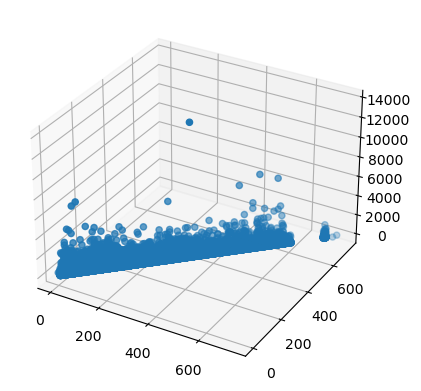

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_df.Recency,rfm_df.Recency,rfm_df.Monetary)
plt.show()

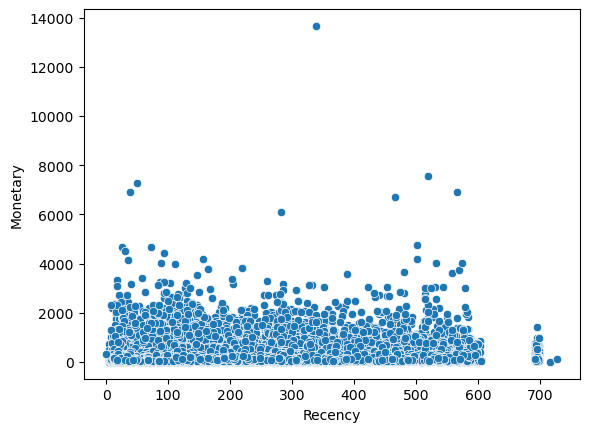

In [116]:
sns.scatterplot(data=rfm_df,x= 'Recency',y='Monetary');

</br>

</br>

</br>

### <a name="C33"><font color='teal'>3.3 Les valeurs manquantes et les doublons du dataframes</font></a> 

#### <font color='teal'>3.3.a Analyse des doublons du dataframes</font>

In [117]:
print("Il y a {} lignes dupliquées".format(df.duplicated().sum()))

Il y a 0 lignes dupliquées


In [118]:
print("Il y a {} lignes dupliquées".format( df.drop(columns="customer_unique_id").duplicated().sum() ))
print("Il y a {} clés primaires dupliquées".format( df["customer_unique_id"].duplicated().sum() ))

Il y a 1 lignes dupliquées
Il y a 0 clés primaires dupliquées


#### <font color='teal'>3.3.b Analyse et Traitement des valeurs manquantes du dataframes</font>

In [119]:
df.columns

Index(['customer_unique_id', 'NbreCommande', 'NbreDarticleTotal_Sum',
       'delai_livraison_Mean', 'NbreDarticleTotal_Mean',
       'NbreArticleUnique_Mean', 'PriceTotal_Mean', 'FreightTotal_Mean',
       'dist_livraison_Mean', 'NbredeFractionPayment_Mean',
       'NbreTypePayment_Mean', 'NbreEchelonPayement_Mean',
       'MontantCommande_Mean', 'LastMeanScore_Mean', 'NbreComment_Mean',
       'countCat_Arts_Crafts_Sewing_Party_Supplies_Mean',
       'countCat_Auto_Tires_Industrial_Construction_Tools_Mean',
       'countCat_Beauty_Personal_Care_Mean',
       'countCat_Home_Furniture_Appliances_Mean',
       'countCat_Home_Improvement_Mean', 'countCat_Movies_TV_Shows_Mean',
       'countCat_Others_Mean', 'countCat_baby_Mean', 'countCat_books_Mean',
       'countCat_costruction_tools_garden_Mean', 'countCat_electronics_Mean',
       'countCat_fashion_Mean', 'countCat_food_drink_Mean',
       'countCat_garden_tools_Mean', 'countCat_housewares_Mean',
       'countCat_music_Mean', 'countC

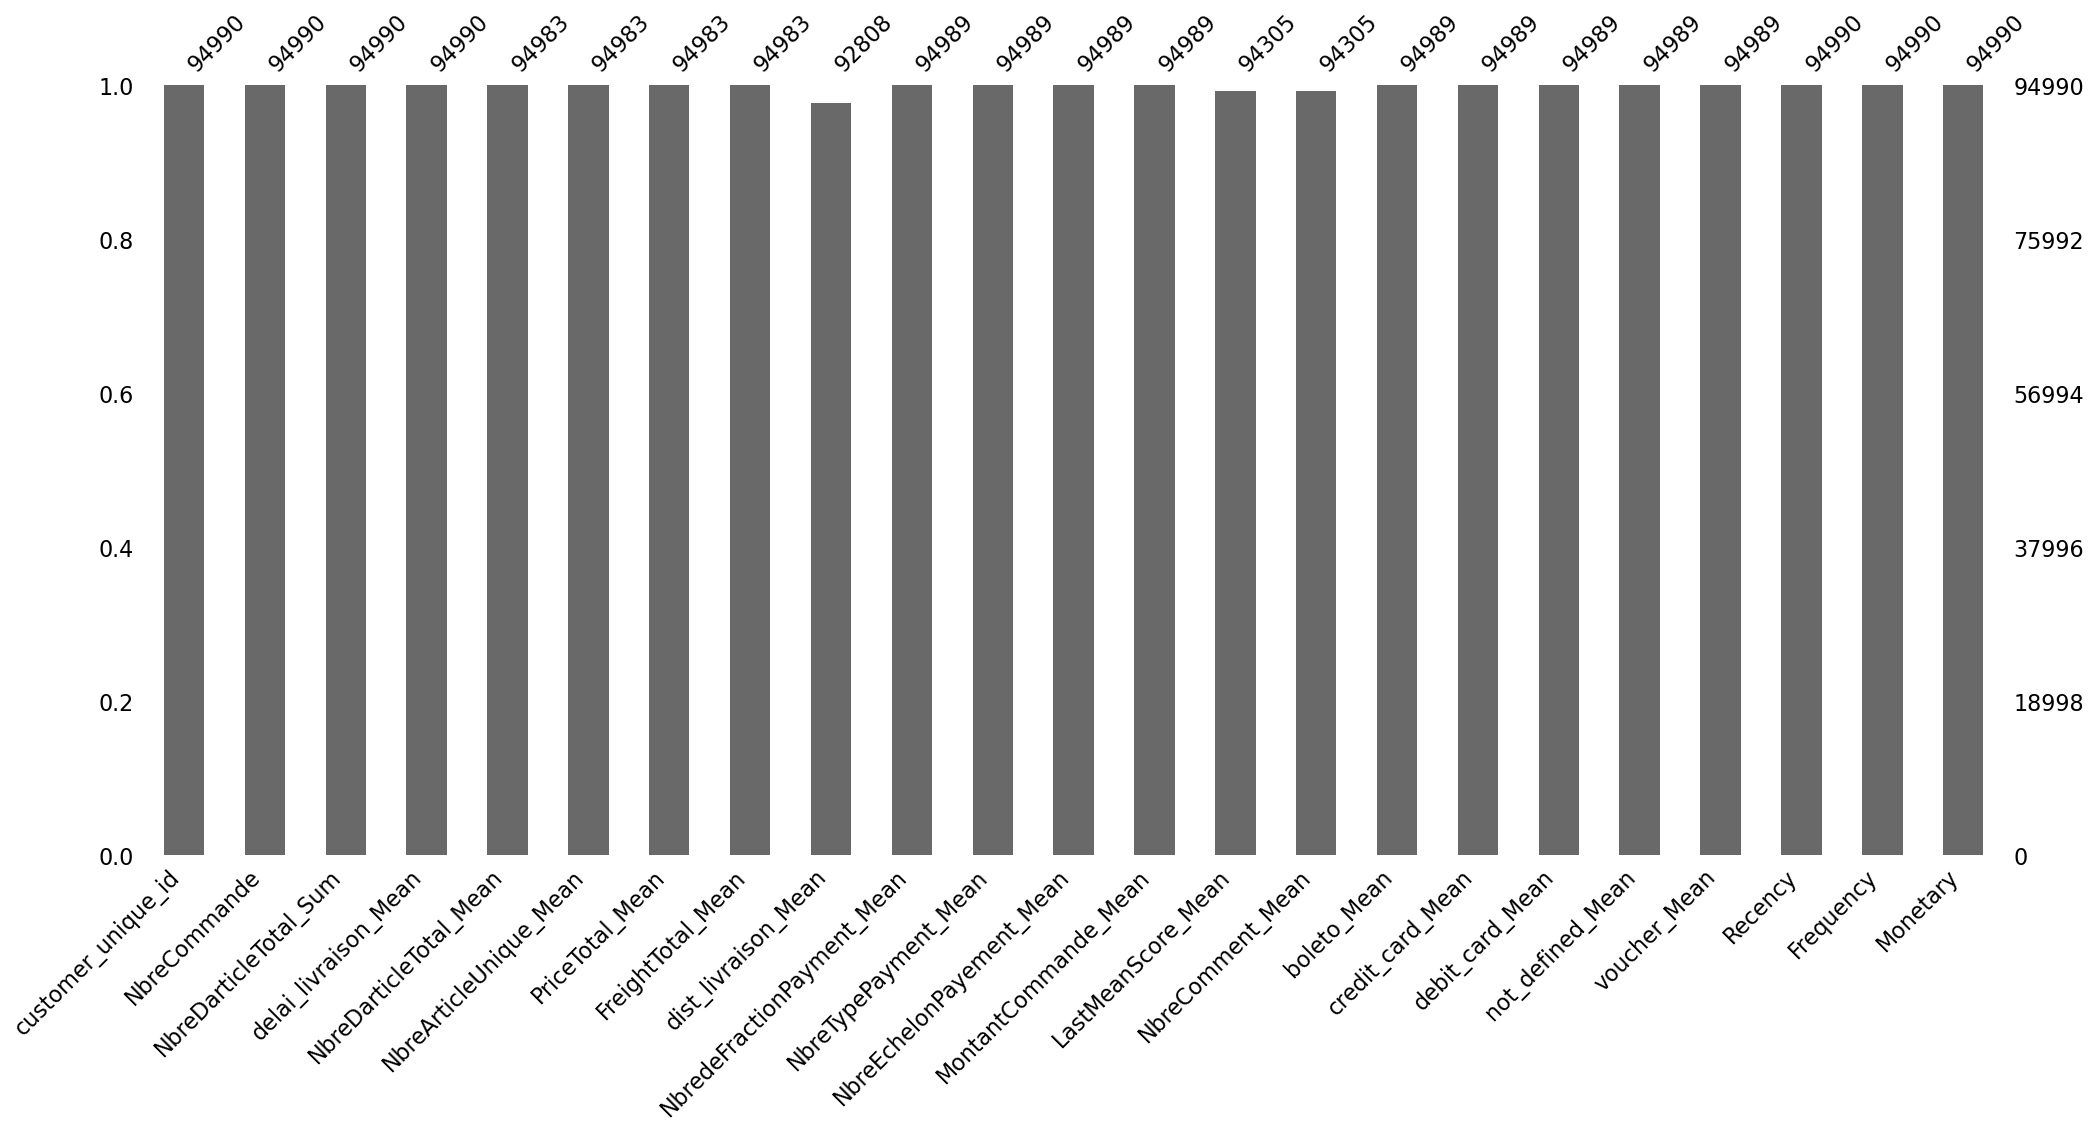

In [120]:
#les variables misc_data
import missingno as msno

msno.bar(df.loc[:,~df.columns.str.startswith('countCat_')]);

In [121]:
def compute_nb_mising_values(data):
    """
    Cree un dataframe pandas qui contient le nombre de valeurs par colonnes de l'argument data
    """
    valeurs = {}
    
    for x in data.columns:
        valeurs[x] = []
        valeurs[x].append(round((data[x].notna().sum()/data.shape[0])*100,2))
        valeurs[x].append(data[x].isna().sum())
        
    return pd.DataFrame.from_dict(data=valeurs, orient='index',
                                  columns = ["Taux de valeurs non nulles", "Nombre de valeurs manquantes"]
                                 ).sort_values(by="Nombre de valeurs manquantes",ascending=True)

In [122]:
compute_nb_mising_values( df.loc[:,~df.columns.str.startswith('countCat_') ] )

Taux de valeurs non nulles  \
customer_unique_id                              100.00   
Recency                                         100.00   
Frequency                                       100.00   
Monetary                                        100.00   
NbreCommande                                    100.00   
NbreDarticleTotal_Sum                           100.00   
delai_livraison_Mean                            100.00   
NbreEchelonPayement_Mean                        100.00   
voucher_Mean                                    100.00   
not_defined_Mean                                100.00   
debit_card_Mean                                 100.00   
NbredeFractionPayment_Mean                      100.00   
NbreTypePayment_Mean                            100.00   
MontantCommande_Mean                            100.00   
credit_card_Mean                                100.00   
boleto_Mean                                     100.00   
NbreDarticleTotal_Mean                           99.99   
FreightTotal_Mean                                99.99   
PriceTotal_Mean                                  99.99   
NbreArticleUnique_Mean                           99.99   
NbreComment_Mean                                 99.28   
LastMeanScore_Mean                               99.28   
dist_livraison_Mean                              97.70   

                            Nombre de valeurs manquantes  
customer_unique_id                                     0  
Recency                                                0  
Frequency                                              0  
Monetary                                               0  
NbreCommande                                           0  
NbreDarticleTotal_Sum                                  0  
delai_livraison_Mean                                   0  
NbreEchelonPayement_Mean                               1  
voucher_Mean                                           1  
not_defined_Mean                                       1  
debit_card_Mean                                        1  
NbredeFractionPayment_Mean                             1  
NbreTypePayment_Mean                                   1  
MontantCommande_Mean                                   1  
credit_card_Mean                                       1  
boleto_Mean                                            1  
NbreDarticleTotal_Mean                                 7  
FreightTotal_Mean                                      7  
PriceTotal_Mean                                        7  
NbreArticleUnique_Mean                                 7  
NbreComment_Mean                                     685  
LastMeanScore_Mean                                   685  
dist_livraison_Mean                                 2182

In [123]:
def drop_NA_columns(data,p):
    '''
    Select features who have more than p% if p<1 na value   
    Select feature contains more than p na value if p>1
    '''
    feature = []
    if p > 1 and p < 100:
        na_df = data.columns[data.isna().sum() > int(p)]
    
    if p <= 1 and p > 0:
        na_df = data.columns[data.isna().sum()/data.shape[0] > p]
    
    return(na_df)

In [124]:
drop_NA_columns(df,p=0.5)

Index([], dtype='object')

#### <div class="alert alert-info"><font color='teal'> Suppression des colonnes dont plus de ...% des valeurs sont manquantes </font></div>

In [125]:
def drop_NA_columns(data,p):
    '''
    Select features who have more than p% if p<1 na value   
    Select feature contains more than p na value if p>1
    '''
    feature = []
    if p > 1 and p < 100:
        na_df = data.columns[data.isna().sum() > int(p)]
    
    if p <= 1 and p > 0:
        na_df = data.columns[data.isna().sum()/data.shape[0] > p]
    
    return(na_df)

In [126]:
drop_NA_columns(df,p=0.5)

Index([], dtype='object')

In [127]:
col_to_drop = drop_NA_columns(df,p=0.5)
df.shape

(94990, 43)

In [128]:
df = df.drop(columns=col_to_drop,inplace=False)
df.shape

(94990, 43)

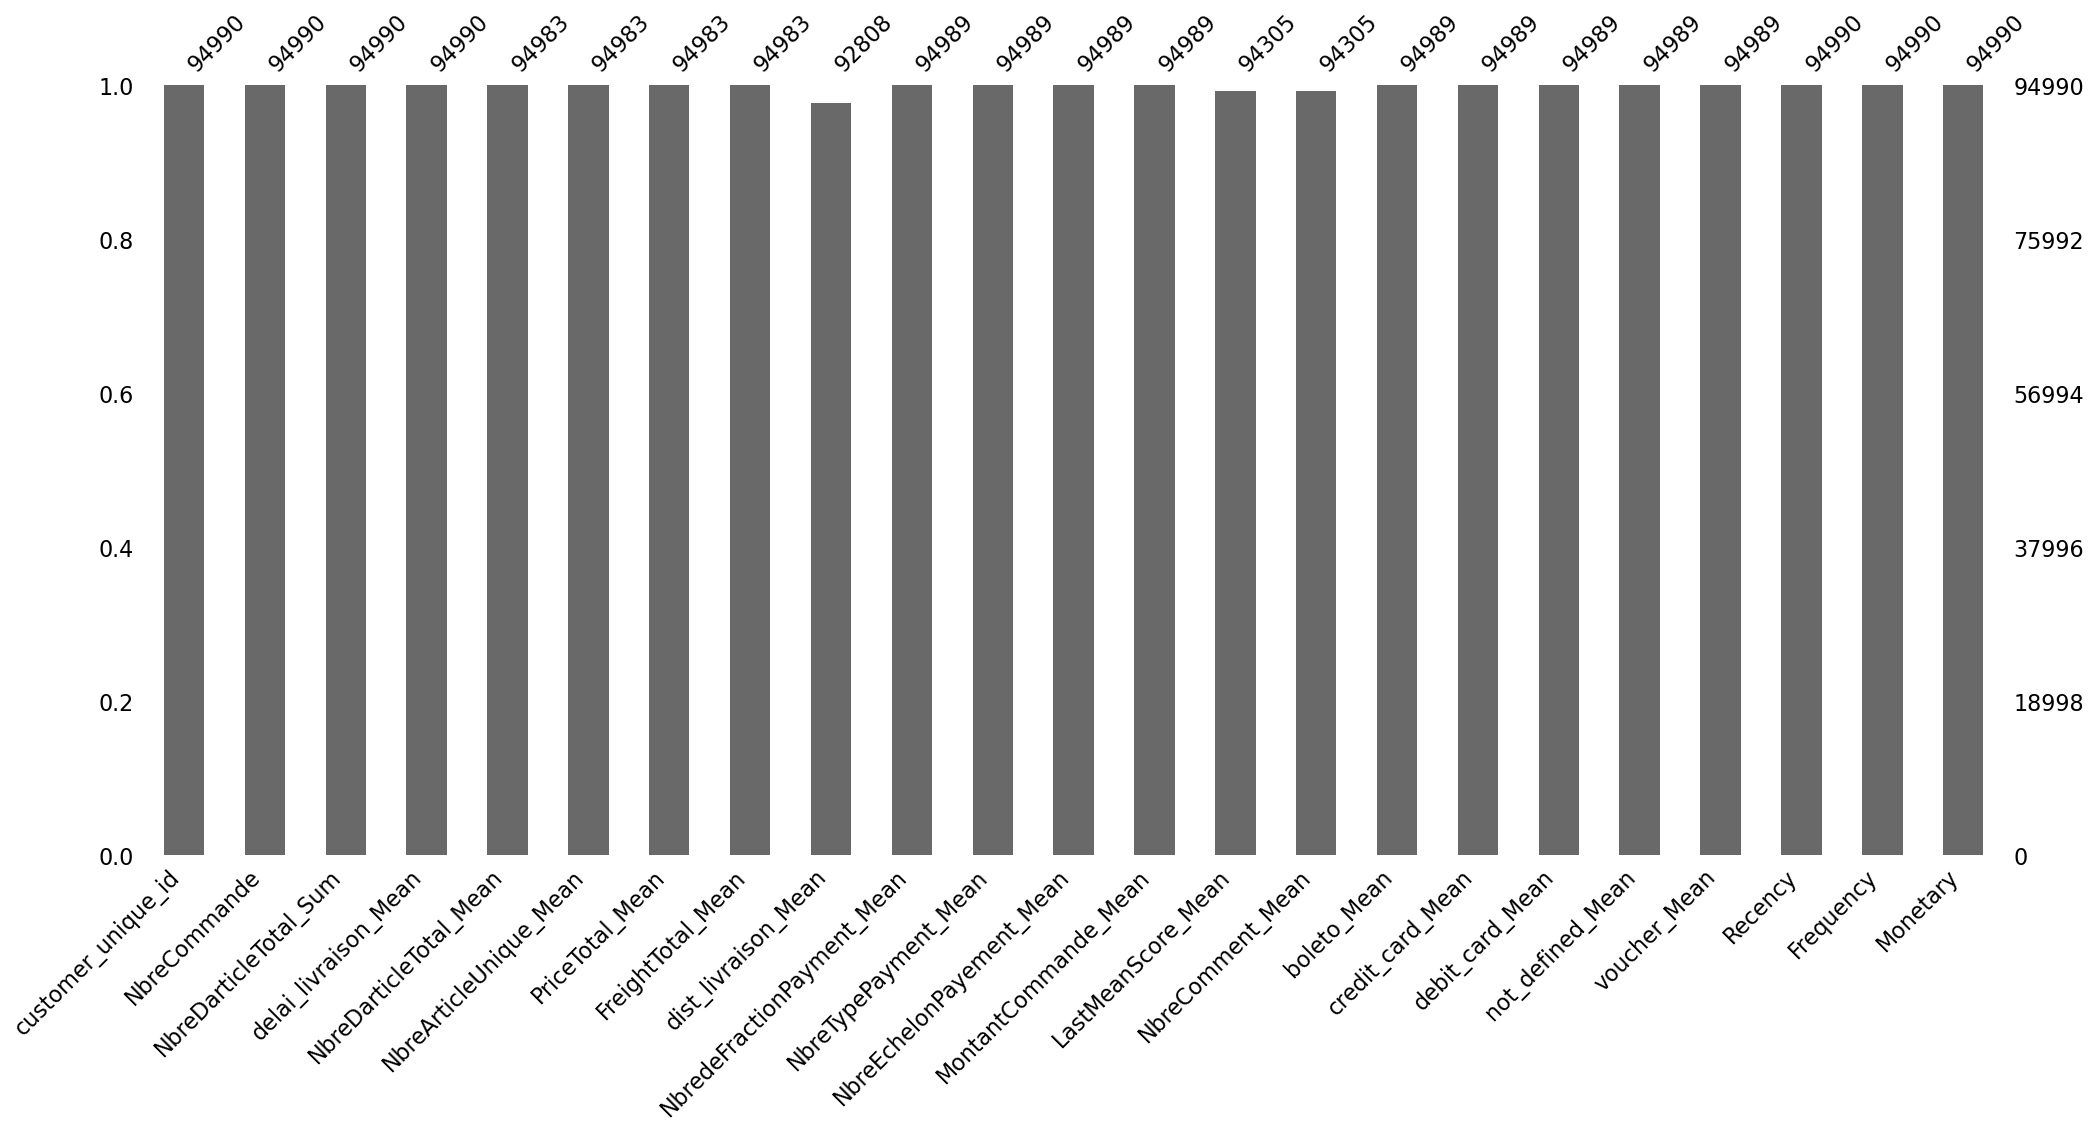

In [129]:
#les variables misc_data
import missingno as msno
msno.bar(df.loc[:,~df.columns.str.startswith('countCat_') ]);

#### <font color='teal'> Imputation des données manquantes </font>

In [130]:
from sklearn.preprocessing import StandardScaler

### <a name="C34"><font color='teal'>3.4 Data inspections</font></a> 

In [131]:
df.loc[:,~df.columns.str.startswith('countCat_') ].describe()

NbreCommande  NbreDarticleTotal_Sum  delai_livraison_Mean  \
count  94990.000000           94990.000000          94990.000000   
mean       1.033867               1.180135             12.342947   
std        0.210826               0.620653              9.736612   
min        1.000000               0.000000              0.000000   
25%        1.000000               1.000000              6.000000   
50%        1.000000               1.000000             10.000000   
75%        1.000000               1.000000             16.000000   
max       16.000000              24.000000            209.000000   

       NbreDarticleTotal_Mean  NbreArticleUnique_Mean  PriceTotal_Mean  \
count            94983.000000            94983.000000     94983.000000   
mean                 1.138898                1.037055       137.908349   
std                  0.525815                0.219793       210.132883   
min                  1.000000                1.000000         0.850000   
25%                  1.000000                1.000000        46.330000   
50%                  1.000000                1.000000        87.020000   
75%                  1.000000                1.000000       149.900000   
max                 21.000000                8.000000     13440.000000   

       FreightTotal_Mean  dist_livraison_Mean  NbredeFractionPayment_Mean  \
count       94983.000000         9.280800e+04                94989.000000   
mean           22.818619         6.039916e+05                    1.044811   
std            21.556345         5.976336e+05                    0.374522   
min             0.000000         0.000000e+00                    1.000000   
25%            13.895000         1.894602e+05                    1.000000   
50%            17.250000         4.354170e+05                    1.000000   
75%            24.140000         8.017996e+05                    1.000000   
max          1794.960000         9.474691e+06                   29.000000   

       NbreTypePayment_Mean  ...  LastMeanScore_Mean  NbreComment_Mean  \
count          94989.000000  ...        94305.000000      94305.000000   
mean               1.022349  ...            4.113753          0.411446   
std                0.146898  ...            1.316698          0.491922   
min                1.000000  ...            1.000000          0.000000   
25%                1.000000  ...            4.000000          0.000000   
50%                1.000000  ...            5.000000          0.000000   
75%                1.000000  ...            5.000000          1.000000   
max                2.000000  ...            5.000000          2.000000   

        boleto_Mean  credit_card_Mean  debit_card_Mean  not_defined_Mean  \
count  94989.000000      94989.000000     94989.000000           94989.0   
mean       0.199268          0.755480         0.015533               0.0   
std        0.398634          0.424915         0.123153               0.0   
min        0.000000          0.000000         0.000000               0.0   
25%        0.000000          0.676546         0.000000               0.0   
50%        0.000000          1.000000         0.000000               0.0   
75%        0.000000          1.000000         0.000000               0.0   
max        1.000000          1.000000         1.000000               0.0   

       voucher_Mean       Recency     Frequency      Monetary  
count  94989.000000  94990.000000  94990.000000  94990.000000  
mean       0.029719    242.448374      1.033867    165.692568  
std        0.158589    152.999947      0.210826    226.740288  
min        0.000000      0.000000      1.000000      0.000000  
25%        0.000000    118.000000      1.000000     63.100000  
50%        0.000000    223.000000      1.000000    107.900000  
75%        0.000000    351.000000      1.000000    182.940000  
max        1.000000    728.000000     16.000000  13664.080000  

[8 rows x 22 columns]

In [132]:
df.loc[:,~df.columns.str.startswith('countCat_') ].describe(exclude = [np.number]) #/include = [objet]/["category"]

customer_unique_id
count                              94990
unique                             94990
top     0000366f3b9a7992bf8c76cfdf3221e2
freq                                   1

### <a name="C35"><font color='teal'>3.5 Data Visualisation Multivariée</font></a> 

CPU times: total: 1min 35s
Wall time: 1min 37s


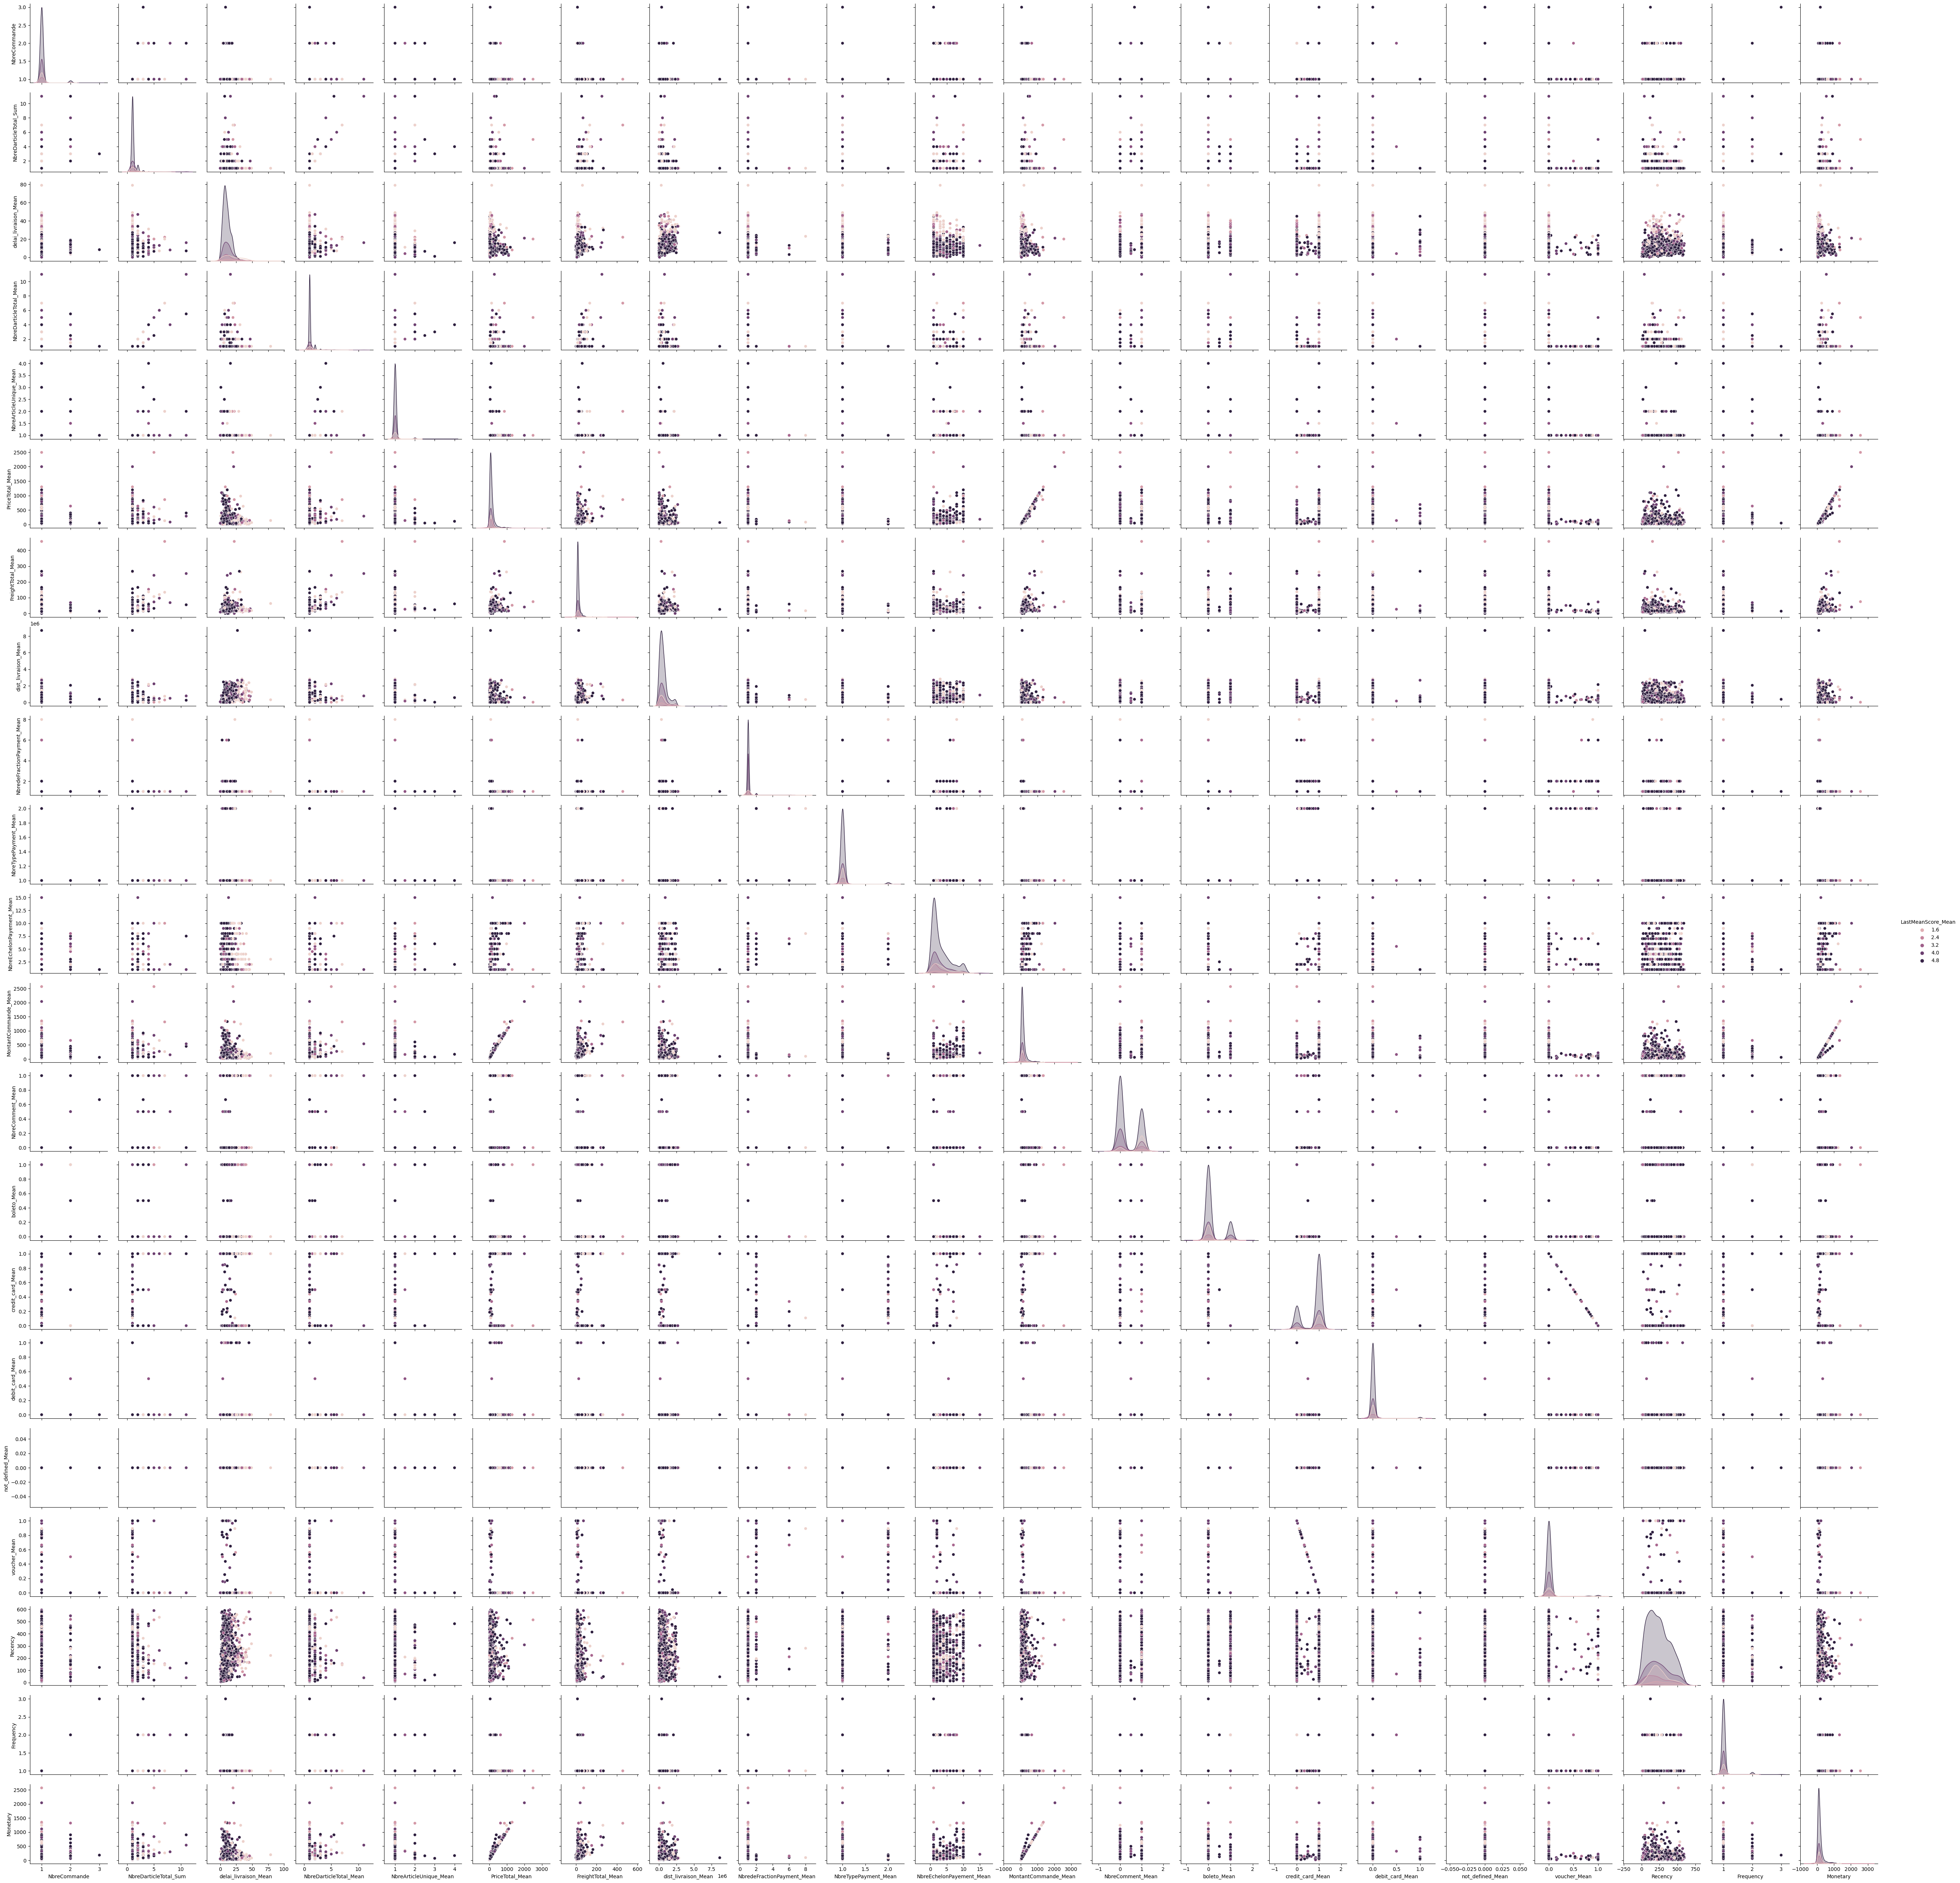

In [133]:
%%time
sns.pairplot(df.loc[:,~df.columns.str.startswith('countCat_') ].dropna().sample(1000),hue='LastMeanScore_Mean');

#### <font color='teal'> - order_status</font>

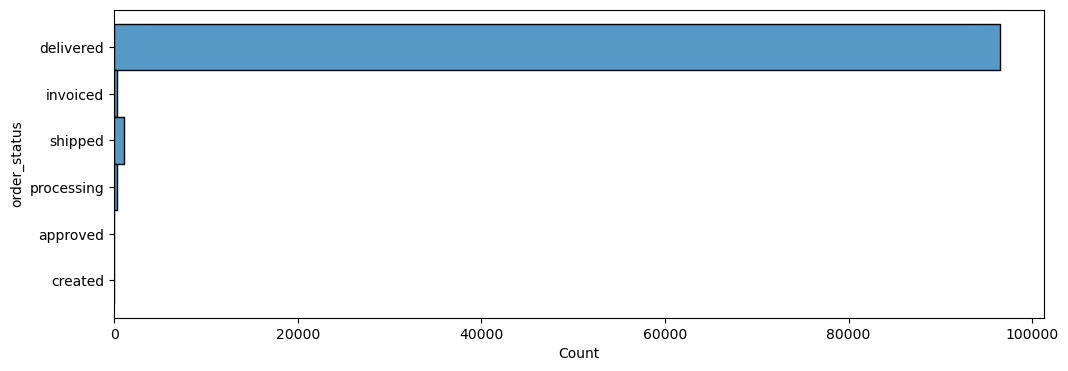

In [134]:
fig,axe = plt.subplots(figsize=(12,4))
sns.histplot(data = clients,y = 'order_status',ax=axe,);

#### <font color='teal'> -Datas Numeriques</font>

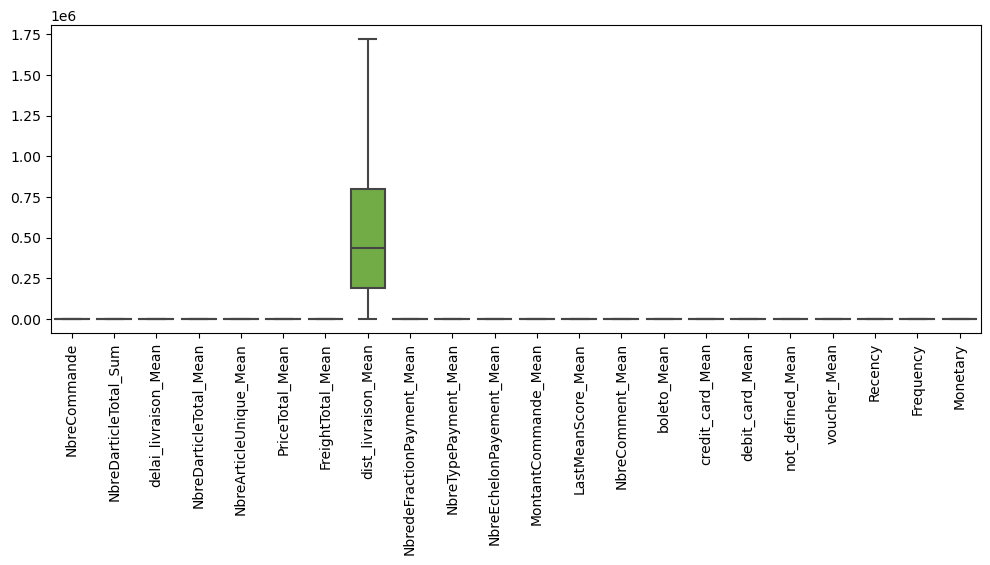

In [135]:
fig,axe = plt.subplots(figsize=(12,4))
sns.boxplot(data = df.loc[:,~df.columns.str.startswith('countCat_') ].drop(columns = 'customer_unique_id'),
            ax=axe,orient = 'v',showfliers = False)
axe.tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='year', ylabel='dist_livraison'>

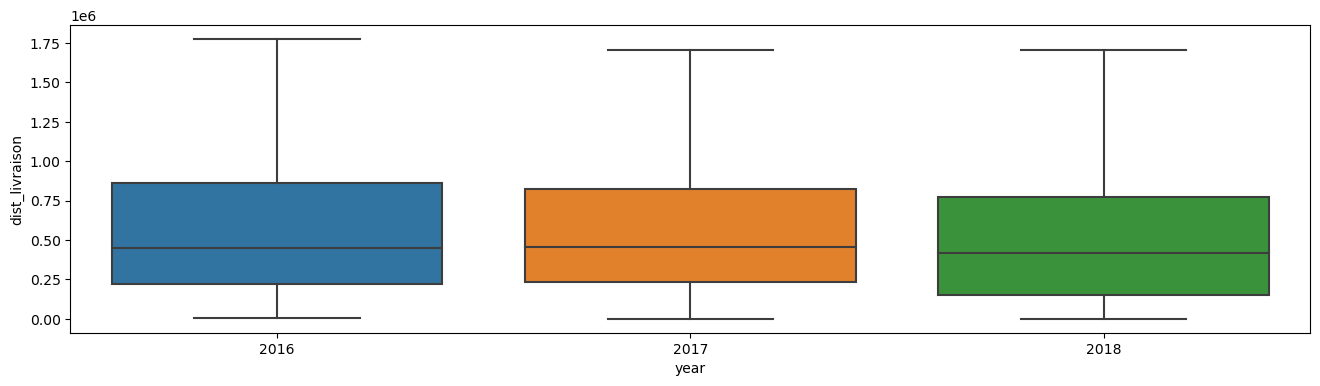

In [136]:
fig,axe = plt.subplots(figsize=(16,4))
sns.boxplot(data = clients,y = 'dist_livraison',x='year',ax=axe,orient = 'v',showfliers = False)

#### <font color='teal'> - 3.5.2 Data target numerique</font>

In [137]:
objCol = df.select_dtypes(exclude=[np.number]).columns
objCol = [x for x in objCol if 'countCat_' not in x ]

CPU times: total: 1.06 s
Wall time: 1.11 s


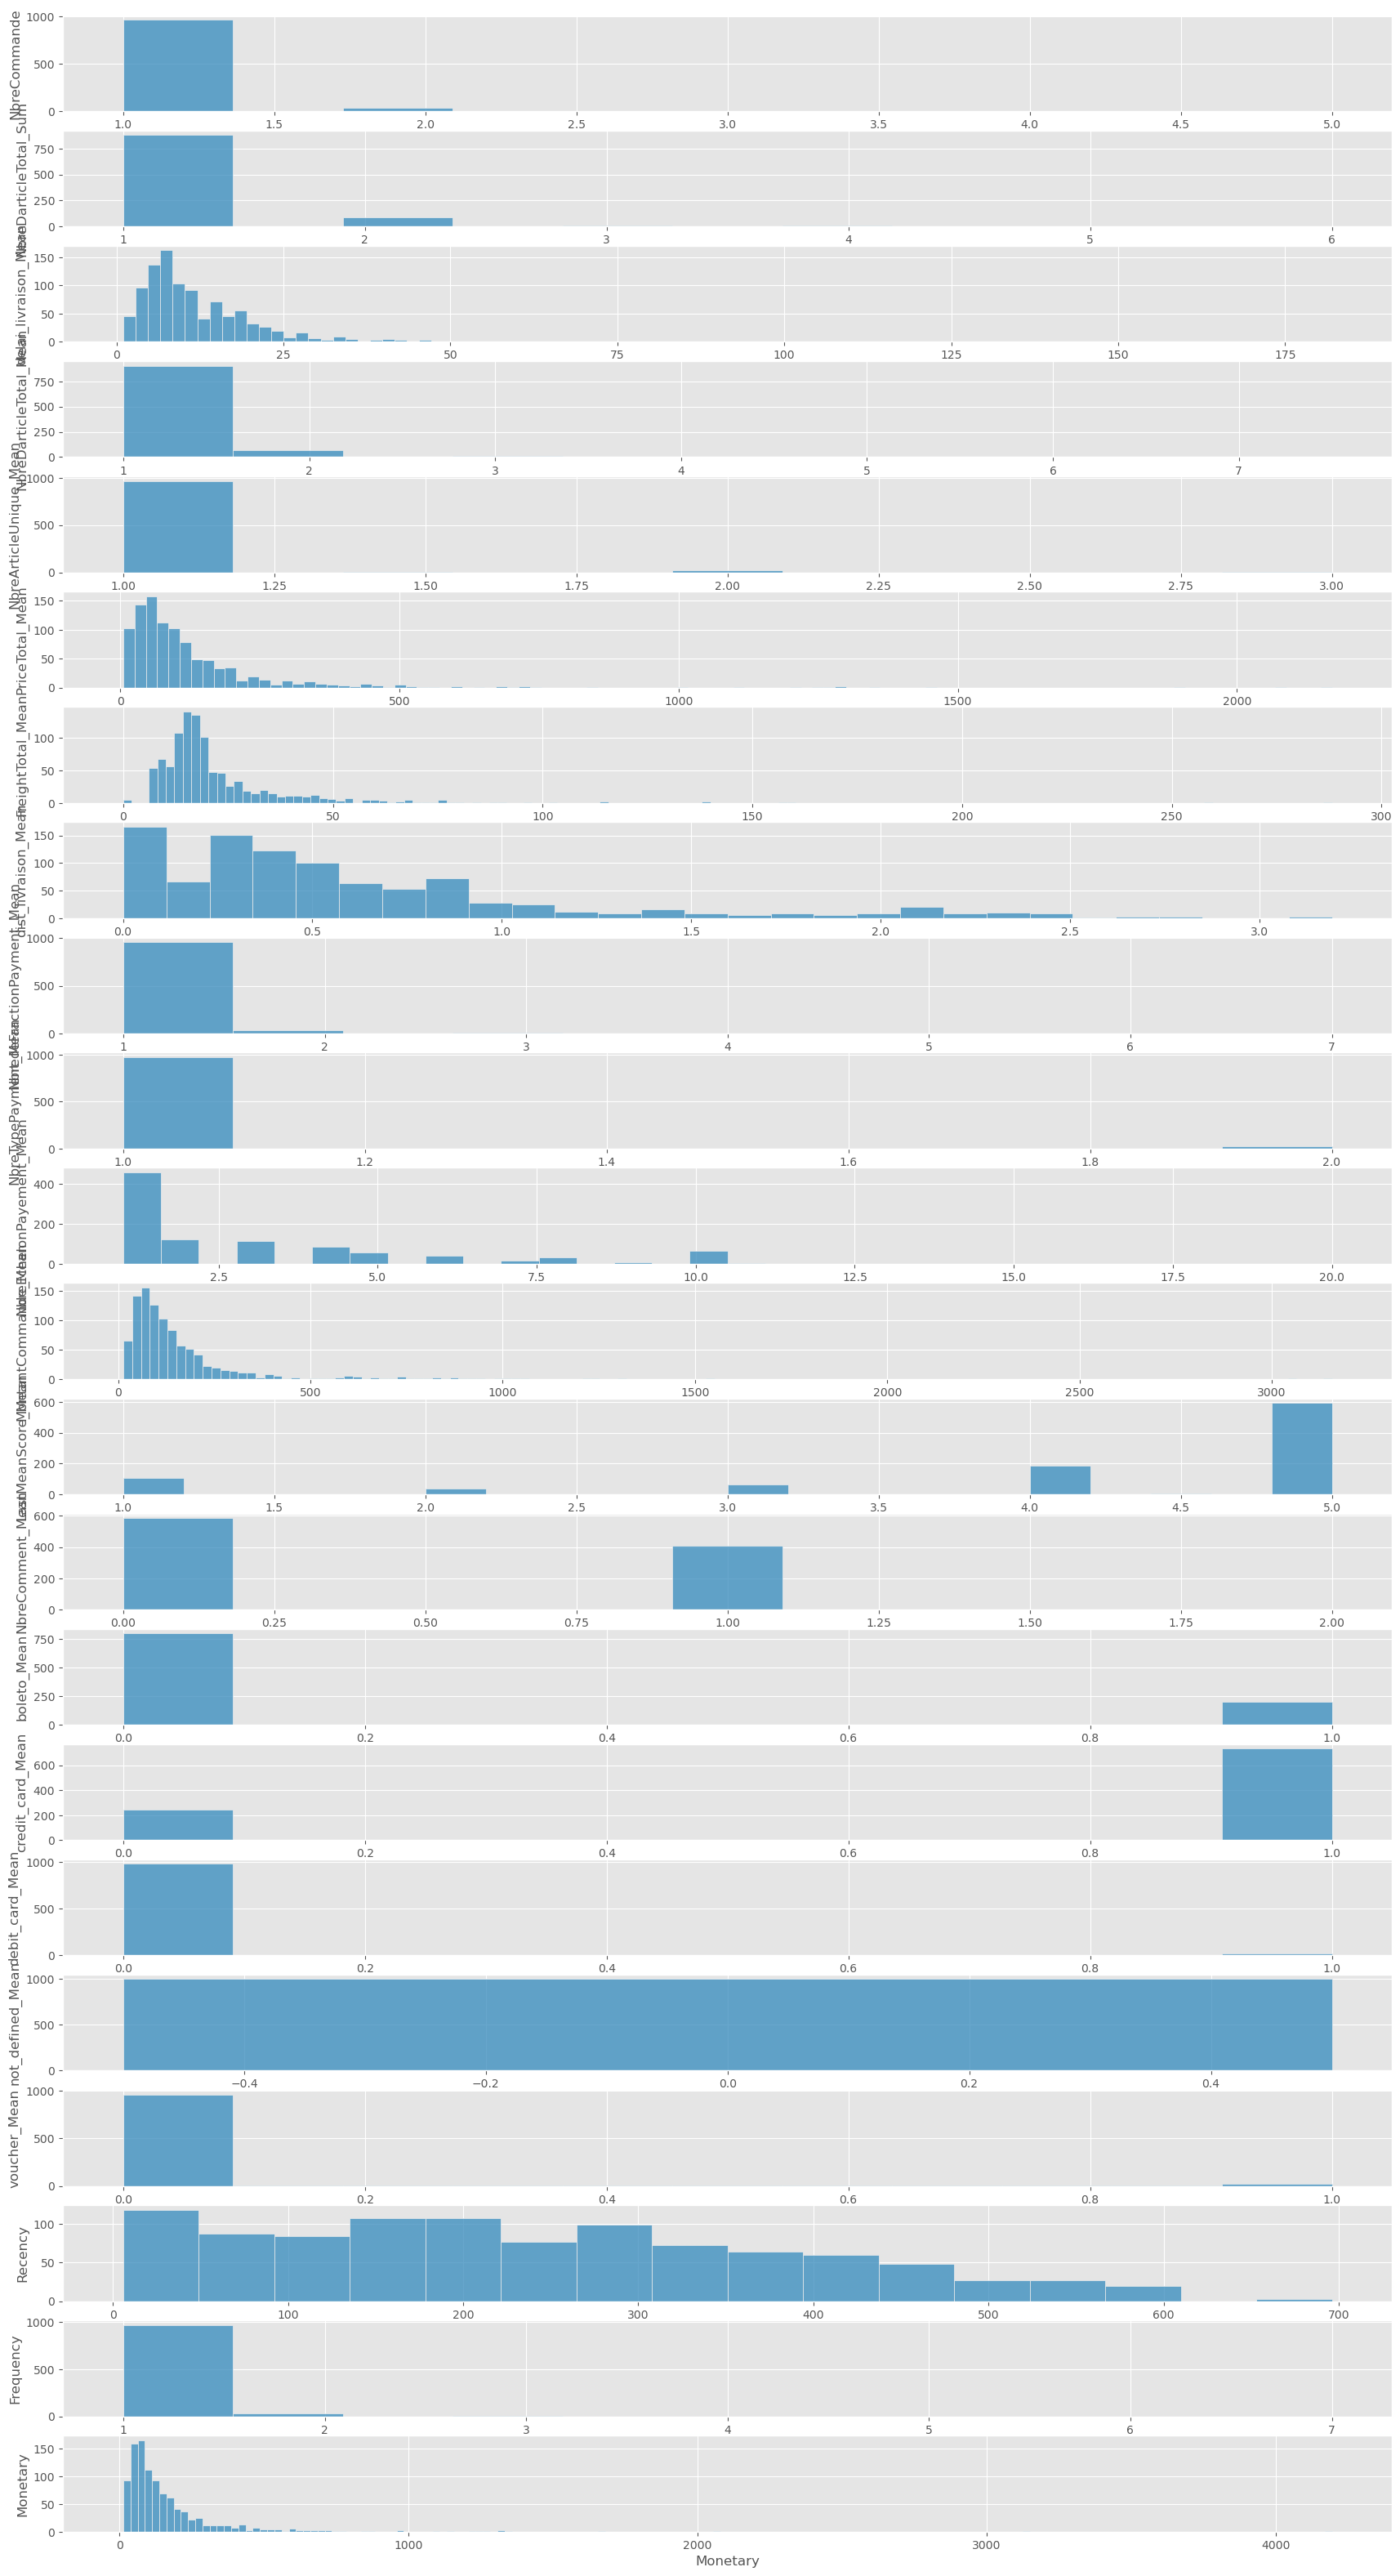

In [138]:
%%time
objCol = df.select_dtypes(include=[np.number]).columns
objCol = [x for x in objCol if 'countCat_' not in x]
plt.style.use('ggplot')
fig,axes = plt.subplots(nrows = len(objCol),ncols = 1,figsize=(21,40))
for i,c in enumerate( objCol ):
    sns.histplot(x=c, data = df.sample(1000),ax=axes[i])
    axes[i].set_ylabel(c)
    #axes.flatten()[i-imp].set_title(col)   

### <a name="C36"><font color='teal'>3.6 Multi Colinéarité</font></a> 

In [139]:
# Etude des correlations
df.loc[:,~pd.Series(df.columns).str.startswith('countCat_', na=False).values].corr()\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=None)

In [140]:
### Suppression de la colonne 'not_defined'
df.drop(columns='not_defined_Mean', inplace=True)

# <a name="C4"><font color='green'>**Partie 4 : Cleaning**</font></a> 

### <a name="C41"><font color='green'>4.1 Encoding object colonnes (LabelEncoding/OrdinalEncoder/OneHotEncoding)</font></a> 

In [141]:
df.select_dtypes(exclude=[np.number]).columns

Index(['customer_unique_id'], dtype='object')

la Colonnes d'identification et la colonne order_status ne nous seront pas utile.

### <a name="C42"><font color='green'>4.2 Rename columns</font></a> 

### <a name="C43"><font color='green'>4.3 Drop useless columns</font></a> 

In [142]:
tmp = df.nunique()
tmp[tmp==1]

Series([], dtype: int64)

### <a name="C44"><font color='green'>4.4 Export csv</font></a> 

In [143]:
path_clean = 'data/cleaned/'
filename_clean = 'base_client.csv'
df.to_csv(path_clean+filename_clean,index=False,sep=';')

</br>

</br>

</br>

</br>

</br>

<b><font color='cyan'>academy</font></b>
</br>
<b><font color='red'>academy</font></b>
</br>
<b><font color='green'>academy</font></b>
</br>
<b><font color='yellow'>academy</font></b>
</br>
<b><font color='blue'>academy</font></b>
</br>
<b><font color='pink'>academy</font></b>
</br>
<b><font color='teal'>academy</font></b>
</br>
<b><font color='grey'>academy</font></b>
</br>
<mark>highlight text</mark>
</br>
<div class="alert alert-info">Example text highlighted in blue background.</div>
<div class="alert alert-success">Example text highlighted in green background.</div>
<div class="alert alert-warning">Example text highlighted in yellow background.</div>
<div class="alert alert-danger">Example text highlighted in red background.</div>
</br>

</br>

</br>

</br>

</br>

<hr>

$$logloss(\theta) = - {1 \over m} \sum_{i=1}^m (y_i  \ln(\hat p(y_i=1)) + (1-y_i)  \ln(1-\hat p(y_i=1)))$$

\begin{equation} logloss(\theta) = - {1 \over m} \sum_{i=1}^m (y_i  \ln(\hat p(y_i=1)) + (1-y_i)  \ln(1-\hat p(y_i=1))) \end{equation}

<hr>

```python
{"minimum": 10, "maximum": 50, "name": "optimiser"}
```

<hr>

✅ Sample text A</br>
✅ Sample text B</br>
✅ Sample text C

<hr>

#### Headers
# Header 1 
## Header 2

#### Styles
*Italic*, **bold**, _underscore_, ~~strikethrough~~

#### Hyperlink
[hyperlink](https://towardsdatascience.com/enrich-your-jupyter-notebook-with-these-tips-55c8ead25255)

#### Table
| Default | Left-aligned | Center-aligned | Right-aligned |
|---------|:-------------|:--------------:|--------------:|
| Default | Left | Center | Right |

#### Others
* Bulleted item 1
    * Bulleted subitem 1
* Bulleted item 2
***
1. Ordered item 1  
    1.1. Ordered subitem 1  
2. Ordered item 2
***
- [ ] Unchecked box
- [x] Checked box